# Analysing the text

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
    print(tok.text, "...", tok.dep_)

The ... det
22-year ... nummod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [2]:
import re
import pandas as pd

import requests

from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [4]:
candidate_sentences = pd.read_csv("./Gita2.csv")
print(candidate_sentences.shape)

(626, 1)


In [5]:
candidate_sentences

purport
0    Bhagavad-gītā is the widely read theistic science summarized in the Gītā-māhātmya (Gloriﬁcation of the Gītā). There it says that one should read Bhagavad-gītā very scrutinizingly with the help of ...
1    Dhṛtarāṣṭra was blind from birth. Unfortunately, he was also bereft of spiritual vision. He knew very well that his sons were equally blind in the matter of religion, and he was sure that they cou...
2    Duryodhana, a great diplomat, wanted to point out the defects of Droṇācārya, the great brāhmaṇa commander in chief. Droṇācārya had some political quarrel with King Drupada, the father of Draupadī,...
3    Even though Dhṛṣṭadyumna was not a very important obstacle in the face of Droṇācārya’s very great power in the military art, there were many others who were causes of fear. They are mentioned by D...
4    Duryodhana mentions the exceptional heroes in  the battle, all of whom are ever victorious. Vikarṇa is the brother of Duryodhana, Aśvatthāmā is the son of Droṇācārya, and Saumadatti, or Bhūriśravā...
5    As far as the others are concerned – like Jayadratha, Kṛtavarmā and Śalya – all are determined to lay down their lives for Duryodhana’s sake. In other words, it is already concluded that all of th...
6    Herein an estimation of comparative strength is made by Duryodhana. He thinks that the strength of his armed forces is immeasurable, being speciﬁcally protected by the most experienced general, Gr...
7    Duryodhana, after praising the prowess of Bhīṣma, further considered that others might think that they had been considered less important, so in his usual diplomatic way, he tried to adjust the si...
8    The grandsire of the Kuru dynasty could understand the inner meaning of the heart of his grandson Duryodhana, and out of his natural compassion for him he tried to cheer him by blowing his conchsh...
9    In contrast with the conchshell blown by Bhīṣmadeva, the conchshells in the hands of Kṛṣṇa and Arjuna are described as transcendental. The sounding of the transcendental conchshells indicated that...
10   Lord Kṛṣṇa is referred to as Hṛṣīkeśa in this verse because He is the owner of all senses. The living entities are part and parcel of Him, and therefore the senses of the living entities are also ...
11   Sañjaya informed King Dhṛtarāṣṭra very tactfully that his unwise policy of deceiving the sons of Pāṇḍu and endeavoring to enthrone his own sons on the seat of the kingdom was not very laudable. Th...
12   When Bhīṣma and the others on the side of Duryodhana blew their respective conchshells, there was no heart-breaking on the part of the Pāṇḍavas. Such occurrences are not mentioned, but in this par...
13   The battle was just about to begin. It is understood from the above statement that the sons of Dhṛtarāṣṭra were more or less disheartened by the unexpected arrangement of military force by the Pāṇ...
14   Although Lord Kṛṣṇa is the Supreme Personality of Godhead, out of His causeless mercy He was engaged in the service of His friend. He never fails in His affection for His devotees, and thus He is ...
15   It was an open secret that Duryodhana wanted to usurp the kingdom of the Pāṇḍavas by evil plans, in collaboration with his father, Dhṛtarāṣṭra. Therefore, all persons who had joined the side of Du...
16   In this verse Arjuna is referred to as Guḍākeśa. Guḍākā means sleep, and one who conquers sleep is called guḍākeśa. Sleep also means ignorance. So Arjuna conquered both sleep and ignorance because...
17   As the Supersoul of all living entities, Lord Kṛṣṇa could understand what was going on in the mind of Arjuna. The use of the word Hṛṣīkeśa in this connection indicates that He knew everything. And...
18   On the battleﬁeld Arjuna could see all kinds of relatives. He could see persons like Bhūriśravā, who were his father’s contemporaries, grandfathers Bhīṣma and Somadatta, teachers like Droṇācārya a...
19   Any man who has genuine devotion to the Lord has all the good qualities which are found in g

In [6]:
candidate_sentences['purport']

0      Bhagavad-gītā is the widely read theistic science summarized in the Gītā-māhātmya (Gloriﬁcation of the Gītā). There it says that one should read Bhagavad-gītā very scrutinizingly with the help of ...
1      Dhṛtarāṣṭra was blind from birth. Unfortunately, he was also bereft of spiritual vision. He knew very well that his sons were equally blind in the matter of religion, and he was sure that they cou...
2      Duryodhana, a great diplomat, wanted to point out the defects of Droṇācārya, the great brāhmaṇa commander in chief. Droṇācārya had some political quarrel with King Drupada, the father of Draupadī,...
3      Even though Dhṛṣṭadyumna was not a very important obstacle in the face of Droṇācārya’s very great power in the military art, there were many others who were causes of fear. They are mentioned by D...
4      Duryodhana mentions the exceptional heroes in  the battle, all of whom are ever victorious. Vikarṇa is the brother of Duryodhana, Aśvatthāmā is the son of Droṇācārya

In [7]:
candidate_sentences.purport[1]

'Dhṛtarāṣṭra was blind from birth. Unfortunately, he was also bereft of spiritual vision. He knew very well that his sons were equally blind in the matter of religion, and he was sure that they could never reach an understanding with the Pāṇḍavas, who were all pious since birth. Still he was doubtful about the inﬂuence of the place of pilgrimage, and Sañjaya could understand his motive in asking about the situation on the battleﬁeld. Sañjaya wanted, therefore, to encourage the despondent king and thus assured him that his sons were not going to make any sort of compromise under the inﬂuence of the holy place. Sañjaya therefore informed the king that his son, Duryodhana, after seeing the military force of the Pāṇḍavas, at once went to the commander in chief, Droṇācārya, to inform him of the real position. Although Duryodhana is mentioned as the king, he still had to go to the commander on account of the seriousness of the situation. He was therefore quite ﬁt to be a politician. But Dury

In [8]:
s = 'He knew very well that his sons were equally blind in the matter of religion, and he was sure that they could never reach an understanding with the Pāṇḍavas, who were all pious since birth.'
d = nlp(s)

for token in d:
    print(token.text,'...',token.pos_,'...',token.dep_)
    
print(get_entities('they could never reach an understanding with the Pāṇḍavas, who were all pious since birth.'), get_relation('they could never reach an understanding with the Pāṇḍavas, who were all pious since birth.'))

He ... PRON ... nsubj
knew ... VERB ... ROOT
very ... ADV ... advmod
well ... ADV ... advmod
that ... ADP ... mark
his ... DET ... poss
sons ... NOUN ... nsubj
were ... VERB ... ccomp
equally ... ADV ... advmod
blind ... ADJ ... acomp
in ... ADP ... prep
the ... DET ... det
matter ... NOUN ... pobj
of ... ADP ... prep
religion ... NOUN ... pobj
, ... PUNCT ... punct
and ... CCONJ ... cc
he ... PRON ... nsubj
was ... VERB ... conj
sure ... ADJ ... acomp
that ... ADP ... mark
they ... PRON ... nsubj
could ... VERB ... aux
never ... ADV ... neg
reach ... VERB ... ccomp
an ... DET ... det
understanding ... NOUN ... dobj
with ... ADP ... prep
the ... DET ... det
Pāṇḍavas ... PROPN ... pobj
, ... PUNCT ... punct
who ... PRON ... nsubj
were ... VERB ... relcl
all ... ADV ... advmod
pious ... ADJ ... acomp
since ... ADP ... prep
birth ... NOUN ... pobj
. ... PUNCT ... punct


NameError: name 'get_entities' is not defined

In [9]:
spacy.explain('pobj')

'object of preposition'

# Pre - Knowledge Graph

### Function to get entity:

In [10]:
def get_entities(sent):
    
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""

#############################################################
    
    doc = nlp(sent)

    for tok in doc:   
    # if token is a punctuation mark, ignore..
        if(tok.dep_ not in ["punct","cc"]):
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

          # check: token is a modifier or not
            if(tok.dep_ != 'advmod' and tok.dep_.endswith("mod")):
                modifier = tok.text
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

          ## Subject
            if tok.dep_.find("subj") == True:
                ent1 = modifier +" "+ prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""      

          ## Predicate
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text


            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
  #############################################################

    return [ent1.strip(), ent2.strip()]

In [11]:
print(get_entities('Sixty Hollywood musicals were released in 1929.'))
print(get_entities('Ankan is with a human'))

['Sixty Hollywood musicals', '1929']
['Ankan', 'human']


### Function to get the relation:

In [12]:
def get_relation(sent):
    
    null = ''
    doc = nlp(sent)

  # Matcher class object 
    matcher = Matcher(nlp.vocab)

  #define the pattern 
    pattern = [{'POS':'VERB'},
               {'DEP':'prep','OP':"?"},
               {'DEP':'agent','OP':"?"},  
               {'POS':'ADV','OP':"?"},
               {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 

    matches = matcher(doc)  
    k = len(matches) - 1
    
    if(k>0):
        span = doc[matches[k][1]:matches[k][2]]
        return(span.text)
    else:
        return null

In [13]:
get_relation("Sixty Hollywood musicals were released in 1929")

'released in'

In [14]:
print(len(candidate_sentences))

626


### Lists for Subject, Relation and Object

In [15]:
def nodes_relation(candidate_sentences):  #made exclusovely for this dataframe with text containes in purport
    string = '' 
    word = ''
    subject = []
    predicate = []
    verb = []

    sub = ''
    pred = ''
    ver = ''


    temp = len(candidate_sentences)
    for j in range(temp):
        for i in candidate_sentences.purport[j]:
    #         print(word)
            if(i in ['.',';'] or word in ['and','but','because','since','so','when','then']):
                sub, pred = get_entities(string)
                subject.append(sub.lower())
                predicate.append(pred.lower())

                ver = get_relation(string)
                verb.append(ver.lower())

                string = ''
                word = ''
            elif(i == ' '):
                print(word)
                word = ''
                string = string + i
            else:
                word = word + i
                string = string + i


    print(subject)            
    print(len(subject))
    print(len(predicate))
    print(len(verb))
    print(len(subject) + len(predicate))

    return subject,verb,predicate

In [15]:
subject, verb, predicate = nodes_relation(candidate_sentences)

Bhagavad-gītā
is
the
widely
read
theistic
science
summarized
in
the
Gītā-māhātmya
(Gloriﬁcation
of
the

There
it
says
that
one
should
read
Bhagavad-gītā
very
scrutinizingly
with
the
help
of
a
person
who
is
a
devotee
of
Śrī
Kṛṣṇa
try
to
understand
it
without
personally
motivated

The
example
of
clear
understanding
is
there
in
the
Bhagavad-gītā
itself,
in
the
way
the
teaching
is
understood
by
Arjuna,
who
heard
the
Gītā
directly
from
the

If
eone
is
fortunate
enough
to
understand
the
Bhagavad-gītā
in
that
line
of
disciplic
succession,
without
motivated
interpretation,
he
surpasses
all
studies
of
Vedic
wisdom,
all
scriptures
of
the

One
will
ﬁnd
in
the
Bhagavad-gītā
all
that
is
contained
in
other
scriptures,
the
reader
will
also
ﬁnd
things
which
are
not
to
be
found

That
is
the
speciﬁc
standard
of
the

It
is
the
perfect
theistic
science
it
is
directly
spoken
by
the
Supreme
Personality
of
Godhead,
Lord
Śrī
The
topics
discussed
by
Dhṛtarāṣṭra
Sañjaya,
as
described
in
the
Mahābhārata,
form
th


Indirectly,
by
the
symbolism
of
the
conchshell,
he
informed
his
depressed
grandson
Duryodhana
that
he
had
no
chance
of
victory
in
the
battle,
the
Supreme
Lord
Kṛṣṇa
was
on
the
other

But
still,
it
was
his
duty
to
conduct
the
ﬁght,
no
pains
would
be
spared
in
that
In
contrast
with
the
conchshell
blown
by
Bhīṣmadeva,
the
conchshells
in
the
hands
of
Kṛṣṇa
Arjuna
are
described
as

The
nding
of
the
transcendental
conchshells
indicated
that
there
was
no
hope
of
victory
for
the
other
side
Kṛṣṇa
was
on
the
side
of
the

Jayas
tu
pāṇḍu-putrāṇāṁ
yeṣāṁ
pakṣe

Victory
is
always
with
persons
like
the
s
of
Pāṇḍu
Lord
Kṛṣṇa
is
associated
with

And
ver
wherever
the
Lord
is
present,
the
goddess
of
fortune
is
also
there
the
goddess
of
fortune
never
lives
alone
without
her

Therefore,
victory
fortune
were
awaiting
Arjuna,
as
indicated
by
the
transcendental
nd
produced
by
the
conchshell
of
Viṣṇu,
or
Lord

Besides
that,
the
chariot
on
which
both
the
friends
were
seated
had
been
donated
by
Agni
(the
ﬁre-god

decided
to
ﬁght
amongst

As
far
as
his
diers
were
concerned,
he
was
sympathetic
from
the
beginning,
he
felt
compassion
even
for
the
diers
of
the
opposite
party,
foreseeing
their
imminent

And
while
he
was
thinking,
the
limbs
of
his
body
began
to
quiver,
his
mouth
became

He
was
more
or
less
astonished
to
see
their
ﬁghting

Practically
the
whole
community,
all
blood
relatives
of
Arjuna,
had
come
to
ﬁght
with

This
overwhelmed
a
kind
devotee
like

Although
it
is
not
mentioned
here,
still
one
can
easily
imagine
that
not
only
were
Arjuna’s
bodily
limbs
quivering
his
mouth
drying
up,
he
was
also
crying
out
of

Such
symptoms
in
Arjuna
were
not
due
to
weakness
to
his
theartedness,
a
characteristic
of
a
pure
devotee
of
the

It
is
said
therefore:yasyāsti
bhaktir
bhagavaty
akiñcanāsarvair
guṇais
tatra
samāsate
surāḥharāv
abhaktasya
kuto
mahad-guṇāmano-rathenāsati
dhāvato
bahiḥ“One
who
has
unﬂinching
devotion
for
the
Personality
of
Godhead
has
all
the
good
qualities
of
the

But
one
who
is
not
a
d


Arjuna,
however,
could
see
the
evil
consequences
could
not
accept
the

Obligation
is
actually
binding
the
effect
is
good,
the
effect
is
otherwise,
no
one
can
be

Considering
all
these
pros
cons,
Arjuna
decided
not
to
In
the
system
of
the
varṇāśrama
institution
there
are
many
principles
of
religious
traditions
to
help
members
of
the
family
grow
properly
attain
spiritual

The
elder
members
are
responsible
for
such
purifying
processes
in
the
family,
beginning
from
birth
to

But
on
the
death
of
the
elder
members,
such
family
traditions
of
puriﬁcation
may
stop,
the
remaining
younger
family
members
may
develop
irreligious
habits
thereby
lose
their
chance
for
spiritual

Therefore,
for
no
purpose
should
the
elder
members
of
the
family
be
Good
population
in
human
iety
is
the
basic
principle
for
peace,
prosperity
spiritual
progress
in

The
varṇāśrama
religion’s
principles
were
designed
that
the
good
population
would
prevail
in
iety
for
the
general
spiritual
progress
of
state

Such
population
de


The
Supreme
Personality
who
possesses
all
riches,
all
strength,
all
fame,
all
beauty,
all
knowledge
all
renunciation
is
called

There
are
many
persons
who
are
very
rich,
very
powerful,
very
beautiful,
very
famous,
very
learned
very
much
detached,
no
one
can
claim
that
he
possesses
all
riches,
all
strength,
,

Only
Kṛṣṇa
can
claim
this
He
is
the
Supreme
Personality
of

No
living
entity,
including
Brahmā,
Lord
Śiva
or
Nārāyaṇa,
can
possess
opulences
as
fully
as

Therefore
it
is
concluded
in
the
Brahma-saṁhitā
by
Lord
Brahmā
himself
that
Lord
Kṛṣṇa
is
the
Supreme
Personality
of

No
one
is
equal
to
or
above

He
is
the
primeval
Lord,
or
Bhagavān,
known
as
Govinda,
He
is
the
supreme
cause
of
all
causes:īśvaraḥ
paramaḥ
kṛṣṇaḥsac-cid-ānanda-vigrahaḥanādir
ādir
govindaḥsarva-kāraṇa-kāraṇam“There
are
many
personalities
possessing
the
qualities
of
Bhagavān,
Kṛṣṇa
is
the
supreme
none
can
excel

He
is
the
Supreme
Person,
His
body
is
eternal,
full
of
knowledge

He
is
the
primeval
Lord
Govinda
the
c


He
offers
himself
to
Kṛṣṇa
as
a

He
wants
to
stop
friendly

Talks
between
the
master
the
disciple
are
serious,
now
Arjuna
wants
to
talk
very
seriously
before
the
recognized
spiritual

Kṛṣṇa
is
therefore
the
original
spiritual
master
of
the
science
of
Bhagavad-gītā,
Arjuna
is
the
ﬁrst
disciple
for
understanding
the

How
Arjuna
understands
the
Bhagavad-gītā
is
stated
in
the
Gītā

And
yet
foolish
mundane
scholars
explain
that
one
need
not
submit
to
Kṛṣṇa
as
a
person,
to
“the
unborn
within
”
There
is
no
difference
between
Kṛṣṇa’s
within

And
one
who
has
no
sense
of
this
understanding
is
the
greatest
fool
in
trying
to
understand
Although
Arjuna
was
putting
forward
many
arguments
based
on
knowledge
of
the
principles
of
religion
moral
codes,
it
appears
that
he
was
unable
to
ve
his
real
problem
without
the
help
of
the
spiritual
master,
Lord
Śrī

He
could
understand
that
his
called
knowledge
was
useless
in
driving
away
his
problems,
which
were
drying
up
his
whole

it
was
impossible
for
him
to


others,
as
it
is
conﬁrmed
in
the
Upaniṣads,
will
continue

This
statement
of
Kṛṣṇa’s
is
authoritative
Kṛṣṇa
cannot
be
subject
to

If
individuality
were
not
a
fact,
Kṛṣṇa
would
not
have
stressed
it
much
–
even
for
the

The
Māyāvādī
may
argue
that
the
individuality
spoken
of
by
Kṛṣṇa
is
not
spiritual,

Even
accepting
the
argument
that
the
individuality
is
material,
how
can
one
distinguish
Kṛṣṇa’s
individuality?
Kṛṣṇa
afﬁrms
His
individuality
in
the
past
conﬁrms
His
individuality
in
the
future

He
has
conﬁrmed
His
individuality
in
many
ways,
impersonal
Brahman
has
been
declared
to
be
subordinate
to

Kṛṣṇa
has
maintained
spiritual
individuality
all

if
He
is
accepted
as
an
ordinary
conditioned
l
in
individual
consciousness,
His
Bhagavad-gītā
has
no
value
as
authoritative

A
common
man
with
all
the
four
defects
of
human
frailty
is
unable
to
teach
that
which
is
worth

The
Gītā
is
above
such

No
mundane
book
compares
with
the

When
one
accepts
Kṛṣṇa
as
an
ordinary
man,
the
Gītā
loses
all

The

This
is
the
beginning
of
the
instruction
by
the
Lord
to
the
living
entities
who
are
bewildered
by
the
inﬂuence
of

Removal
of
ignorance
involves
the
reestablishment
of
the
eternal
relationship
between
the
worshiper
the
worshipable
the
consequent
understanding
of
the
difference
between
the
part-and-parcel
living
entities
the
Supreme
Personality
of

One
can
understand
the
nature
of
the
Supreme
by
thorough
study
of
oneself,
the
difference
between
oneself
the
Supreme
being
understood
as
the
relationship
between
the
part
the

In
the
Vedānta-sūtras,
as
well
as
in
the
Śrīmad-Bhāgavatam,
the
Supreme
has
been
accepted
as
the
origin
of
all

Such
emanations
are
experienced
by
superior
inferior
natural

The
living
entities
belong
to
the
superior
nature,
as
it
will
be
revealed
in
the
Seventh

Although
there
is
no
difference
between
the
energy
the
energetic,
the
energetic
is
accepted
as
the
Supreme,
the
energy
or
nature
is
accepted
as
the

The
living
entities,
therefore,
are
always
subordinate
to
th


The
body
develops
of
the
l’s
presence,
the
l
has
neither
offshoots
nor

Therefore,
the
l
is
free
from
the
six
changes
of
the
In
the
Kaṭha
Upaniṣad
18)
we
also
ﬁnd
a
similar
passage,
which
reads:na
jāyate
mriyate
vā
vipaścinnāyaṁ
kutaścin
na
babhūva
kaścitajo
nityaḥ
śāśvato
’yaṁ
purāṇona
hanyate
hanyamāne
śarīreThe
meaning
purport
of
this
verse
is
the
same
as
in
the
Bhagavad-gītā,
here
in
this
verse
there
is
one
special
word,
vipaścit,
which
means
learned
or
with
The
l
is
full
of
knowledge,
or
full
always
with

Therefore,
consciousness
is
the
symptom
of
the

Even
if
one
does
not
ﬁnd
the
l
within
the
heart,
where
he
is
situated,
one
can
still
understand
the
presence
of
the
l
simply
by
the
presence
of

Sometimes
we
do
not
ﬁnd
the
sun
in
the
sky
owing
to
clouds,
or
for
e
other
reason,
the
light
of
the
sun
is
always
there,
we
are
convinced
that
it
is
therefore

As
n
as
there
is
a
little
light
in
the
sky
early
in
the
morning,
we
can
understand
that
the
sun
is
in
the

Similarly,
there
is
e
c

l
cannot
be
burned
by

Therefore,
there
is
no
doubt
that
there
are
living
entities
also
in
the
sun
planet
with
suitable
bodies
to
live

If
the
sun
globe
is
uninhabited,
the
word
sarva-gata
–
“living
everywhere”
–
becomes
As
described
previously,
the
magnitude
of
the
l
is
small
for
our
material
calculation
that
he
cannot
be
seen
even
by
the
most
powerful

therefore,
he
is

As
far
as
the
l’s
existence
is
concerned,
no
one
can
establish
his
existence
experimentally
beyond
the
proof
of
śruti,
or
Vedic

We
have
to
accept
this
truth,
there
is
no
other
rce
of
understanding
the
existence
of
the
l,
although
it
is
a
fact
by

There
are
many
things
we
have
to
accept
ely
on
grounds
of
superior

No
one
can
deny
the
existence
of
his
father,
based
upon
the
authority
of
his

There
is
no
rce
of
understanding
the
identity
of
the
father
except
by
the
authority
of
the

Similarly,
there
is
no
rce
of
understanding
the
l
except
by
studying
the

In
other
words,
the
l
is
inconceivable
by
human
experimental

The

minor

And
it
is
still
more
difﬁcult
to
ﬁnd
a
man
who
has
actually
derived
full
beneﬁt
from
knowledge
of
the
l,
who
is
able
to
describe
the
position
of
the
l
in
different

But
if,
ehow
or
other,
one
is
able
to
understand
the
subject
matter
of
the
l,
one’s
life
is
The
easiest
process
for
understanding
the
subject
matter
of
self,
however,
is
to
accept
the
statements
of
the
Bhagavad-gītā
spoken
by
the
greatest
authority,
Lord
Kṛṣṇa,
without
being
deviated
by
other

But
it
also
requires
a
great
deal
of
penance
sacriﬁce,
either
in
this
life
or
in
the
previous
ones,
before
one
is
able
to
accept
Kṛṣṇa
as
the
Supreme
Personality
of

Kṛṣṇa
can,
however,
be
known
as
such
by
the
causeless
mercy
of
the
pure
devotee
by
no
other
The
Lord
now
concludes
the
chapter
of
instruction
on
the
immutable
spirit

In
describing
the
immortal
l
in
various
ways,
Lord
Kṛṣṇa
establishes
that
the
l
is
immortal
the
body
is

Therefore
Arjuna
as
a
kṣatriya
should
not
abandon
his
duty
out
of
fear
that
his
grandfather
tea


Kṛṣṇa,
therefore,
wanted
to
explain
to
Arjuna
that
by
killing
the
body
of
his
grandfather
he
would
not
be
killing
the
l
proper,
He
explained
that
all
individual
persons,
including
the
Lord
Himself,
are
eternal

they
were
individuals
in
the
past,
they
are
individuals
in
the
present,
they
will
continue
to
remain
individuals
in
the
future,
all
of
us
are
individual
ls

We
simply
change
our
bodily
dress
in
different
manners,
actually
we
keep
our
individuality
even
after
liberation
from
the
bondage
of
material

An
analytical
study
of
the
l
the
body
has
been
very
graphically
explained
by
Lord

And
this
descriptive
knowledge
of
the
l
the
body
from
different
angles
of
vision
has
been
described
here
as
Sāṅkhya,
in
terms
of
the
Nirukti

This
Sāṅkhya
has
nothing
to
do
with
the
Sāṅkhya
philosophy
of
the
atheist

Long
before
the
imposter
Kapila’s
Sāṅkhya,
the
Sāṅkhya
philosophy
was
expounded
in
the
Śrīmad-Bhāgavatam
by
the
true
Lord
Kapila,
the
incarnation
of
Lord
Kṛṣṇa,
who
explained
it
to
His
mot

l
beyond
the
conception
of
the
body
–
not
theoretically
practically,
there
is
no
longer
a
chance
for
sense
gratiﬁcation
manifested
in
fruitive

One
who
is
not
ﬁrmly
ﬁxed
in
mind
is
diverted
by
various
types
of
fruitive
People
in
general
are
not
very
intelligent,
due
to
their
ignorance
they
are
most
attached
to
the
fruitive
activities
recommended
in
the
karma-kāṇḍa
portions
of
the

They
do
not
want
anything
more
than
sense
gratiﬁcatory
proposals
for
enjoying
life
in
heaven,
where
wine
women
are
available
material
opulence
is
very

In
the
Vedas
many
sacriﬁces
are
recommended
for
elevation
to
the
heavenly
planets,
especially
the
Jyotiṣṭoma

In
fact,
it
is
stated
that
anyone
desiring
elevation
to
heavenly
planets
must
perform
these
sacriﬁces,
men
with
a
poor
fund
of
knowledge
think
that
this
is
the
whole
purpose
of
Vedic

It
is
very
difﬁcult
for
such
inexperienced
persons
to
be
situated
in
the
determined
action
of
Kṛṣṇa

As
fools
are
attached
to
the
ﬂowers
of
poisonous
trees
without
knowin


Indirectly,
Arjuna
was
advised
to
act
as
Kṛṣṇa
told
One
who
has
actually
come
to
understand
one’s
constitutional
position
as
an
eternal
servitor
of
the
Lord
gives
up
all
engagements
save
working
in
Kṛṣṇa

As
already
explained,
buddhi-yoga
means
transcendental
loving
service
to
the

Such
devotional
service
is
the
right
course
of
action
for
the
living

Only
misers
desire
to
enjoy
the
fruit
of
their
own
work
just
to
be
further
entangled
in
material

Except
for
work
in
Kṛṣṇa
consciousness,
all
activities
are
abominable
they
continually
bind
the
worker
to
the
cycle
of
birth

One
should
therefore
never
desire
to
be
the
cause
of

Everything
should
be
done
in
Kṛṣṇa
consciousness,
for
the
satisfaction
of

Misers
do
not
know
how
to
utilize
the
assets
of
riches
which
they
acquire
by
good
fortune
or
by
hard

One
should
spend
all
energies
working
in
Kṛṣṇa
consciousness,
that
will
make
one’s
life

Like
misers,
unfortunate
persons
do
not
employ
their
human
energy
in
the
service
of
the
Since
time
imm


he
sees
that
his
miseries,
by
the
grace
of
the
Lord,
are
minimized
to
the

Similarly,
he
is
happy
he
gives
credit
to
the
Lord,
thinking
himself
unworthy
of
the

he
realizes
that
it
is
due
only
to
the
Lord’s
grace
that
he
is
in
such
a
comfortable
condition
able
to
render
better
service
to
the

And,
for
the
service
of
the
Lord,
he
is
always
daring
active
is
not
inﬂuenced
by
attachment
or

Attachment
means
accepting
things
for
one’s
own
sense
gratiﬁcation,
detachment
is
the
absence
of
such
sensual

But
one
ﬁxed
in
Kṛṣṇa
consciousness
has
neither
attachment
nor
detachment
his
life
is
dedicated
in
the
service
of
the

Consequently
he
is
not
at
all
angry
even
his
attempts
are

Success
or
no
success,
a
Kṛṣṇa
conscious
person
is
always
steady
in
his
There
is
always
e
upheaval
in
the
material
world
which
may
be
good
or

One
who
is
not
agitated
by
such
material
upheavals,
who
is
unaffected
by
good
evil,
is
to
be
understood
to
be
ﬁxed
in
Kṛṣṇa

As
long
as
one
is
in
the
material
world
there
is
alw

258)By
development
of
Kṛṣṇa
consciousness
one
can
know
that
everything
has
its
use
in
the
service
of
the

Those
who
are
without
knowledge
of
Kṛṣṇa
consciousness
artiﬁcially
try
to
avoid
material
objects,
as
a
result,
although
they
desire
liberation
from
material
bondage,
they
do
not
attain
to
the
perfect
stage
of

Their
called
renunciation
is
called
phalgu,
or
less

On
the
other
hand,
a
person
in
Kṛṣṇa
consciousness
knows
how
to
use
everything
in
the
service
of
the

therefore
he
does
not
become
a
victim
of
material

For
example,
for
an
impersonalist,
the
Lord,
or
the
Absolute,
being
impersonal,
cannot

Whereas
an
impersonalist
tries
to
avoid
good
eatables,
a
devotee
knows
that
Kṛṣṇa
is
the
supreme
enjoyer
that
He
eats
all
that
is
offered
to
Him
in

So,
after
offering
good
eatables
to
the
Lord,
the
devotee
takes
the
remnants,
called

Thus
everything
becomes
spiritualized,
there
is
no
danger
of
a

The
devotee
takes
prasādam
in
Kṛṣṇa
consciousness,
whereas
the
nondevotee
rejects
it
as

Th

l
in
the
previous
chapter,
with
a
view
to
delivering
His
intimate
friend
Arjuna
from
the
ocean
of
material

And
the
path
of
realization
has
been
recommended:
buddhi-yoga,
or
Kṛṣṇa

Sometimes
Kṛṣṇa
consciousness
is
misunderstood
to
be
inertia,
one
with
such
a
misunderstanding
often
withdraws
to
a
secluded
place
to
become
fully
Kṛṣṇa
conscious
by
chanting
the
holy
name
of
Lord

But
without
being
trained
in
the
philosophy
of
Kṛṣṇa
consciousness,
it
is
not
advisable
to
chant
the
holy
name
of
Kṛṣṇa
in
a
secluded
place,
where
one
may
acquire
only
cheap
adoration
from
the
innocent

Arjuna
also
thought
of
Kṛṣṇa
consciousness
or
buddhi-yoga,
or
intelligence
in
spiritual
advancement
of
knowledge,
as
ething
like
retirement
from
active
life
the
practice
of
penance
austerity
at
a
secluded

In
other
words,
he
wanted
to
skillfully
avoid
the
ﬁghting
by
using
Kṛṣṇa
consciousness
as
an

But
as
a
e
student,
he
placed
the
matter
before
his
master
questioned
Kṛṣṇa
as
to
his
best
course
of

In
answer,
Lord


called
transcendentalist,
renouncing
work
living
at
the
cost
of
Since
one
has
to
work
even
for
the
simple
maintenance
of
the
body,
the
prescribed
duties
for
a
particular
ial
position
quality
are
made
that
that
purpose
can
be

Yajña
means
Lord
Viṣṇu,
or
sacriﬁcial

All
sacriﬁcial
performances
also
are
meant
for
the
satisfaction
of
Lord

The
Vedas
enjoin:
yajño
vai

In
other
words,
the
same
purpose
is
served
whether
one
performs
prescribed
yajñas
or
directly
serves
Lord

Kṛṣṇa
consciousness
is
therefore
performance
of
yajña
as
it
is
prescribed
in
this

The
varṇāśrama
institution
also
aims
at
satisfying
Lord

Varṇāśramācāravatā
puruṣeṇa
paraḥ
pumān/
viṣṇur
ārādhyate
(Viṣṇu
Purāṇa
Therefore
one
has
to
work
for
the
satisfaction
of

Any
other
work
done
in
this
material
world
will
be
a
cause
of
bondage,
for
both
good
evil
work
have
their
reactions,
any
reaction
binds
the

Therefore,
one
has
to
work
in
Kṛṣṇa
consciousness
to
satisfy
Kṛṣṇa
(or

while
performing
such
activities
one
is
in
a
liber

also
the
eaters
of
all
kinds
of

How
can
a
person
be
happy
if
he
is
both
a
thief
sinful?
It
is
not

Therefore,
in
order
for
people
to
become
happy
in
all
respects,
they
must
be
taught
to
perform
the
easy
process
of
saṅkīrtana-yajña,
in
full
Kṛṣṇa

Otherwise,
there
can
be
no
peace
or
happiness
in
the
Śrīla
Baladeva
Vidyābhūṣaṇa,
a
great
commentator
on
the
Bhagavad-gītā,
writes
as
follows:
ye
indrādy-aṅgatayāvasthitaṁ
yajñaṁ
sarveśvaraṁ
viṣṇum
abhyarcya
tac-cheṣam
aśnanti
tena
tad
deha-yātrāṁ
sampādayanti,
te
santaḥ
sarveśvarasya
yajña-puruṣasya
bhaktāḥ
sarva-kilbiṣair
anādi-kāla-vivṛddhair
ātmānubhava-pratibandhakair
nikhilaiḥ
pāpair

The
Supreme
Lord,
who
is
known
as
the
yajña-puruṣa,
or
the
personal
beneﬁciary
of
all
sacriﬁces,
is
the
master
of
all
the
demigods,
who
serve
Him
as
the
different
limbs
of
the
body
serve
the

Demigods
like
Indra,
Candra
Varuṇa
are
appointed
ofﬁcers
who
manage
material
affairs,
the
Vedas
direct
sacriﬁces
to
satisfy
these
demigods
that
they
may
be
pleased
to


That
is
perfect
action
of
the
highest
degree,
recommended
by
the
Supreme
Personality
of
Godhead,
Śrī
Vedic
rituals,
like
prescribed
sacriﬁces,
are
performed
for
puriﬁcation
of
impious
activities
that
were
performed
in
the
ﬁeld
of
sense

But
action
in
Kṛṣṇa
consciousness
is
transcendental
to
the
reactions
of
good
or
evil

A
Kṛṣṇa
conscious
person
has
no
attachment
for
the
result
acts
on
behalf
of
Kṛṣṇa

He
engages
in
all
kinds
of
activities,
is
completely
Kings
like
Janaka
were
all
self-realized

consequently
they
had
no
obligation
to
perform
the
prescribed
duties
in
the

Nonetheless
they
performed
all
prescribed
activities
just
to
set
examples
for
the
people
in

Janaka
was
the
father
of
Sītā
father-in-law
of
Lord
Śrī

Being
a
great
devotee
of
the
Lord,
he
was
transcendentally
situated,
he
was
the
king
of
Mithilā
(a
subdivision
of
Bihar
province
in
India),
he
had
to
teach
his
subjects
how
to
perform
prescribed

Lord
Kṛṣṇa
Arjuna,
the
Lord’s
eternal
friend,
had
no
need
to
ﬁght
in
the
Ba


But
through
fruitive
activities
sense
gratiﬁcation
regulated
by
the
Vedic
rituals
one
is
gradually
elevated
to
Kṛṣṇa

Therefore
a
realized
l
in
Kṛṣṇa
consciousness
should
not
disturb
others
in
their
activities
or
understanding,
he
should
act
by
showing
how
the
results
of
all
work
can
be
dedicated
to
the
service
of

The
learned
Kṛṣṇa
conscious
person
may
act
in
such
a
way
that
the
ignorant
person
working
for
sense
gratiﬁcation
may
learn
how
to
act
how
to

Although
the
ignorant
man
is
not
to
be
disturbed
in
his
activities,
a
slightly
developed
Kṛṣṇa
conscious
person
may
directly
be
engaged
in
the
service
of
the
Lord
without
waiting
for
other
Vedic

For
this
fortunate
man
there
is
no
need
to
follow
the
Vedic
rituals,
by
direct
Kṛṣṇa
consciousness
one
can
have
all
the
results
one
would
otherwise
derive
from
following
one’s
prescribed
Two
persons,
one
in
Kṛṣṇa
consciousness
the
other
in
material
consciousness,
working
on
the
same
level,
may
appear
to
be
working
on
the
same
platform,
there


called
yogī
or
transcendentalist

It
is
better
to
be
situated
in
one’s
position
to
try
to
attain
Kṛṣṇa
consciousness
under
superior

Thus
one
may
be
freed
from
the
clutches
of
Kṛṣṇa’s
Those
who
are
in
Kṛṣṇa
consciousness
are
naturally
reluctant
to
engage
in
material
sense

But
those
who
are
not
in
such
consciousness
should
follow
the
rules
regulations
of
the
revealed

Unrestricted
sense
enjoyment
is
the
cause
of
material
encagement,
one
who
follows
the
rules
regulations
of
the
revealed
scriptures
does
not
become
entangled
by
the
sense

For
example,
sex
enjoyment
is
a
necessity
for
the
conditioned
l,
sex
enjoyment
is
allowed
under
the
license
of
marriage

According
to
scriptural
injunctions,
one
is
forbidden
to
engage
in
sex
relationships
with
any
women
other
than
one’s

All
other
women
are
to
be
considered
as
one’s

But
in
spite
of
such
injunctions,
a
man
is
still
inclined
to
have
sex
relationships
with
other

These
propensities
are
to
be

otherwise
they
will
be
stumbling
blocks
on
the


similarly,
the
criminals
who
are
disobedient
to
the
laws
of
the
Lord
are
shackled
by
sex

Advancement
of
material
civilization
on
the
basis
of
sense
gratiﬁcation
means
increasing
the
duration
of
the
material
existence
of
a
living

Therefore,
this
lust
is
the
symbol
of
ignorance
by
which
the
living
entity
is
kept
within
the
material

While
one
enjoys
sense
gratiﬁcation,
it
may
be
that
there
is
e
feeling
of
happiness,
actually
that
called
feeling
of
happiness
is
the
ultimate
enemy
of
the
sense
The
enemy
has
captured
different
strategic
positions
in
the
body
of
the
conditioned
l,
therefore
Lord
Kṛṣṇa
is
giving
hints
of
those
places,
that
one
who
wants
to
conquer
the
enemy
may
know
where
he
can
be

Mind
is
the
center
of
all
the
activities
of
the
senses,
thus
we
hear
about
sense
objects
the
mind
generally
becomes
a
reservoir
of
all
ideas
of
sense


as
a
result,
the
mind
the
senses
become
the
repositories
of

Next,
the
intelligence
department
becomes
the
capital
of
such
lustful

Intelligenc


Since
the
Vedic
instructions
are
accepted
as
they
are,
without
human
interpretation,
the
Gītā
must
therefore
be
accepted
without
mundane

The
mundane
wranglers
may
speculate
on
the
Gītā
in
their
own
ways,
that
is
not
Bhagavad-gītā
as
it

Therefore,
Bhagavad-gītā
has
to
be
accepted
as
it
is,
from
the
disciplic
succession,
it
is
described
herein
that
the
Lord
spoke
to
the
sun-god,
the
sun-god
spoke
to
his

Manu,
Manu
spoke
to
his

It
is
clearly
stated
that
the
Gītā
was
especially
meant
for
the
saintly
kings
they
were
to
execute
its
purpose
in
ruling
over
the

Certainly
Bhagavad-gītā
was
never
meant
for
the
demonic
persons,
who
would
dissipate
its
value
for
no
one’s
beneﬁt
would
devise
all
types
of
interpretations
according
to
personal

As
n
as
the
original
purpose
was
scattered
by
the
motives
of
the
unscrupulous
commentators,
there
arose
the
need
to
reestablish
the
disciplic

Five
thousand
years
ago
it
was
detected
by
the
Lord
Himself
that
the
disciplic
succession
was
broken,
therefore



And
the
Lord’s
body
self
are
identical,
His
position
is
always
different
from
that
of
the
ordinary
living
entity,
even
He
descends
to
the
material

The
demons
cannot
adjust
themselves
to
this
transcendental
nature
of
the
Lord,
which
the
Lord
Himself
explains
in
the
following
The
Lord
has
spoken
about
the
peculiarity
of
His
birth:
although
He
may
appear
like
an
ordinary
person,
He
remembers
everything
of
His
many,
many
past
“births,”
whereas
a
common
man
cannot
remember
what
he
has
done
even
a
few
hours

If
eone
is
asked
what
he
did
exactly
at
the
same
time
one
day
earlier,
it
would
be
very
difﬁcult
for
a
common
man
to
answer

He
would
surely
have
to
dredge
his
memory
to
recall
what
he
was
doing
exactly
at
the
same
time
one
day

And
yet,
men
often
dare
claim
to
be
God,
or

One
should
not
be
misled
by
such
meaningless

Then
again,
the
Lord
explains
His
prakṛti,
or
His

Prakṛti
means
“nature,”
as
well
as
svarūpa,
or
“one’s
own
”
The
Lord
says
that
He
appears
in
His
own

He
does
not
chang


Although
Prahlāda
Mahārāja
was
the

of
Hiraṇyakaśipu,
he
was
nonetheless
persecuted
by
his

although
Devakī,
the
mother
of
Kṛṣṇa,
was
the
sister
of
Kaṁsa,
she
her
husband
Vasudeva
were
persecuted
only
Kṛṣṇa
was
to
be
born
of

So
Lord
Kṛṣṇa
appeared
primarily
to
deliver
Devakī
rather
than
kill
Kaṁsa,
both
were
performed

Therefore
it
is
said
here
that
to
deliver
the
devotee
vanquish
the
demon
miscreants,
the
Lord
appears
in
different
In
the
Caitanya-caritāmṛta
of
Kṛṣṇadāsa
Kavirāja,
the
following
verses
(Madhya
263–264)
summarize
these
principles
of
incarnation:sṛṣṭi-hetu
yei
mūrti
prapañce
avataresei
īśvara-mūrti
‘avatāra’
nāma
dharemāyātīta
paravyome
sabāra
avasthānaviśve
avatari’
dhare
‘avatāra’
nāma“The
avatāra,
or
incarnation
of
Godhead,
descends
from
the
kingdom
of
God
for
material

And
the
particular
form
of
the
Personality
of
Godhead
who
descends
is
called
an
incarnation,
or

Such
incarnations
are
situated
in
the
spiritual
world,
the
kingdom
of

When
they
descend
to
the
materia

acquires
a
taste
for
hearing
about
the
Absolute
Personality
of
Godhead,
Śrī

This
taste
leads
one
further
forward
to
attachment
for
Kṛṣṇa
consciousness,
which
is
matured
in
bhāva,
or
the
preliminary
stage
of
transcendental
love
of

Real
love
for
God
is
called
prema,
the
highest
perfectional
stage
of
”
In
the
prema
stage
there
is
constant
engagement
in
the
transcendental
loving
service
of
the

So,
by
the
slow
process
of
devotional
service,
under
the
guidance
of
the
bona
ﬁde
spiritual
master,
one
can
attain
the
highest
stage,
being
freed
from
all
material
attachment,
from
the
fearfulness
of
one’s
individual
spiritual
personality,
from
the
frustrations
that
result
in
void

Then
one
can
ultimately
attain
to
the
abode
of
the
Supreme
Everyone
is
searching
for
Kṛṣṇa
in
the
different
aspects
of
His

Kṛṣṇa,
the
Supreme
Personality
of
Godhead,
is
partially
realized
in
His
impersonal
brahma-jyotir
effulgence
as
the
all-pervading
Supersoul
dwelling
within
everything,
including
the
particles
of

Bu


The
Supreme
Lord
knows
all
His
past
activities,
as
well
as
those
of
persons
who
acted
in
Kṛṣṇa
consciousness
in
the

Therefore
He
recommends
the
acts
of
the
sun-god,
who
learned
this
art
from
the
Lord
e
millions
of
years

All
such
students
of
Lord
Kṛṣṇa
are
mentioned
here
as
past
liberated
persons,
engaged
in
the
discharge
of
duties
allotted
by
Action
in
Kṛṣṇa
consciousness
has
to
be
executed
in
accord
with
the
examples
of
previous
bona
ﬁde

This
is
recommended
in
the
ﬁfteenth

Why
such
action
should
not
be
independent
will
be
explained
in
the
text
to
To
act
in
Kṛṣṇa
consciousness,
one
has
to
follow
the
leadership
of
authorized
persons
who
are
in
a
line
of
disciplic
succession
as
explained
in
the
beginning
of
this

The
system
of
Kṛṣṇa
consciousness
was
ﬁrst
narrated
to
the
sun-god,
the
sun-god
explained
it
to
his

Manu,
Manu
explained
it
to
his

Ikṣvāku,
the
system
is
current
on
this
earth
from
that
very
remote

Therefore,
one
has
to
follow
in
the
footsteps
of
previous
authorities
in


the
jyotir
is
covered
by
illusion
(māyā)
or
sense
gratiﬁcation,
it
is
called

This
material
veil
can
be
removed
at
once
by
Kṛṣṇa

thus
the
offering
for
the
sake
of
Kṛṣṇa
consciousness,
the
consuming
agent
of
such
an
offering
or
contribution,
the
process
of
consumption,
the
contributor
the
result
are
–
all
combined
together
–
Brahman,
or
the
Absolute

The
Absolute
Truth
covered
by
māyā
is
called

Matter
dovetailed
for
the
cause
of
the
Absolute
Truth
regains
its
spiritual

Kṛṣṇa
consciousness
is
the
process
of
converting
the
illusory
consciousness
into
Brahman,
or
the

When
the
mind
is
fully
absorbed
in
Kṛṣṇa
consciousness,
it
is
said
to
be
in
samādhi,
or

Anything
done
in
such
transcendental
consciousness
is
called
yajña,
or
sacriﬁce
for
the

In
that
condition
of
spiritual
consciousness,
the
contributor,
the
contribution,
the
consumption,
the
performer
or
leader
of
the
performance
the
result
or
ultimate
gain
–
everything
–
becomes
one
in
the
Absolute,
the
Supreme

That
is
the
method
of



So
at
the
end
of
life,
he
is
naturally
transferred
to
the
transcendental
plane
of
Lord

consequently
he
makes
no
attempt
to
increase
his

He
is
at
once
raised
to
the
platform
of
liberation,
as
stated
in
Bhagavad-gītā
26):māṁ
ca
yo
’vyabhicāreṇabhakti-yogena
sevatesa
guṇān
samatītyaitānbrahma-bhūyāya
kalpate“One
who
engages
in
unalloyed
devotional
service
to
the
Lord
transcends
the
modes
of
material
nature
is
immediately
elevated
to
the
spiritual
”
A
Kṛṣṇa
conscious
person
begins
from
the
transcendental
stage,
he
is
constantly
in
that

Therefore,
there
is
no
falling
down,
ultimately
he
enters
into
the
abode
of
the
Lord
without

The
practice
of
reduced
eating
is
automatically
done
one
eats
only
kṛṣṇa-prasādam,
or
food
which
is
offered
ﬁrst
to
the

Reducing
the
eating
process
is
very
helpful
in
the
matter
of
sense

And
without
sense
control
there
is
no
possibility
of
getting
out
of
the
material
From
the
foregoing
explanation
of
different
types
of
sacriﬁce
(namely
sacriﬁce
of
one’s
posses

one
is
engaged
in
transcendental
service
through
Kṛṣṇa
consciousness,
one
becomes
at
once
liberated
from
this

One
can
acquire
such
pure
knowledge
only
from
the
bona
ﬁde
spiritual
master
thereby
avoid
the
delusion
that
the
living
entity
is
equal
to

Perfect
knowledge
is
that
the
Supreme
Soul,
Kṛṣṇa,
is
the
supreme
shelter
for
all
living
entities,
giving
up
such
shelter,
the
living
entities
are
deluded
by
the
material
energy,
imagining
themselves
to
have
a
separate

Thus,
under
different
standards
of
material
identity,
they
become
forgetful
of

When,
however,
such
deluded
living
entities
become
situated
in
Kṛṣṇa
consciousness,
it
is
to
be
understood
that
they
are
on
the
path
of
liberation,
as
conﬁrmed
in
the
Bhāgavatam
6):
muktir
hitvānyathā-rūpaṁ
svarūpeṇa

Liberation
means
to
be
situated
in
one’s
constitutional
position
as
an
eternal
servitor
of
Kṛṣṇa
(Kṛṣṇa
Proper
understanding
of
one’s
constitutional
position
in
relationship
to
Kṛṣṇa
is
nice
that
it
can
at
once
lift
one
from
the
str


Although
this
body
is
temporary,
it
is
always
giving
one
trouble
in
many

Therefore,
to
act
for
sense
gratiﬁcation
is
not

One
is
considered
to
be
a
failure
in
life
as
long
as
he
makes
no
inquiry
about
his
real

As
long
as
he
does
not
know
his
real
identity,
he
has
to
work
for
fruitive
results
for
sense
gratiﬁcation,
as
long
as
one
is
engrossed
in
the
consciousness
of
sense
gratiﬁcation
one
has
to
transmigrate
from
one
body
to

Although
the
mind
may
be
engrossed
in
fruitive
activities
inﬂuenced
by
ignorance,
one
must
develop
a
love
for
devotional
service
to

Only
can
one
have
the
opportunity
to
get
out
of
the
bondage
of
material
”Therefore,
jñāna
(or
knowledge
that
one
is
not
this
material
body
spirit
l)
is
not
sufﬁcient
for

One
has
to
act
in
the
status
of
spirit
l,
otherwise
there
is
no
escape
from
material

Action
in
Kṛṣṇa
consciousness
is
not,
however,
action
on
the
fruitive

Activities
performed
in
full
knowledge
strengthen
one’s
advancement
in
real

Without
Kṛṣṇa
consciousness,



Therefore,
the
Kṛṣṇa
conscious
person
is
always
free,
even
though
he
appears
to
be
engaged
in
affairs
of
the

Activities
such
as
seeing
hearing
are
actions
of
the
senses
meant
for
receiving
knowledge,
whereas
moving,
speaking,
evacuating,
,
are
actions
of
the
senses
meant
for

A
Kṛṣṇa
conscious
person
is
never
affected
by
the
actions
of
the

He
cannot
perform
any
act
except
in
the
service
of
the
Lord
he
knows
that
he
is
the
eternal
servitor
of
the
Here
brahmaṇi
means
in
Kṛṣṇa

The
material
world
is
a
sum
total
manifestation
of
the
three
modes
of
material
nature,
technically
called
the

The
Vedic
hymns
sarvaṁ
hy
etad
brahma
(Māṇḍūkya
Upaniṣad
2),
tasmād
etad
brahma
nāma
rūpam
annaṁ
ca
jāyate
(Muṇḍaka
Upaniṣad
9),

in
the
Bhagavad-gītā
3),
mama
yonir
mahad
brahma
indicate
that
everything
in
the
material
world
is
a
manifestation
of

although
the
effects
are
differently
manifested,
they
are
nondifferent
from
the

In
the
Īśopaniṣad
it
is
said
that
everything
is
related
to
the
Supreme
Brahm

that
he
may
be

The
Lord
engages
him
in
impious
activities
that
he
may
go
to
”
(Kauṣītakī
Upaniṣad
8)ajño
jantur
anīśo
’yamātmanaḥ
sukha-duḥkhayoḥīśvara-prerito
gacchetsvargaṁ
vāśv
abhram
eva
ca“The
living
entity
is
completely
dependent
in
his
distress

By
the
will
of
the
Supreme
he
can
go
to
heaven
or
hell,
as
a
cloud
is
driven
by
the
”Therefore
the
embodied
l,
by
his
immemorial
desire
to
avoid
Kṛṣṇa
consciousness,
causes
his
own

Consequently,
although
he
is
constitutionally
eternal,
blissful
cognizant,
due
to
the
littleness
of
his
existence
he
forgets
his
constitutional
position
of
service
to
the
Lord
is
thus
entrapped
by

And,
under
the
spell
of
ignorance,
the
living
entity
claims
that
the
Lord
is
responsible
for
his
conditional

The
Vedānta-sūtras
34)
also
conﬁrm

Vaiṣamya-nairghṛṇye
na
sāpekṣatvāt
tathā
hi
darśayati:
“The
Lord
neither
hates
nor
likes
anyone,
though
He
appears
”Those
who
have
forgotten
Kṛṣṇa
must
certainly
be
bewildered,
those
who
are
in
Kṛṣṇa
consciousness
are
no

”In
the
Śrīmad-Bhāgavatam
also
1)
it
is
said:nāyaṁ
deho
deha-bhājāṁ
nṛ-lokekaṣṭān
kāmān
arhate
viḍ-bhujāṁ
yetapo
divyaṁ
putrakā
yena
sattvaṁśuddhyed
yasmād
brahma-saukhyaṁ
tv
anantam“My
dear
s,
there
is
no
reason
to
labor
very
hard
for
sense
pleasure
while
in
this
human
form
of

such
pleasures
are
available
to
the
stool-eaters

Rather,
you
should
undergo
penances
in
this
life
by
which
your
existence
will
be
puriﬁed,
as
a
result
you
will
be
able
to
enjoy
unlimited
transcendental
”Therefore,
those
who
are
true
yogīs
or
learned
transcendentalists
are
not
attracted
by
sense
pleasures,
which
are
the
causes
of
continuous
material

The
more
one
is
addicted
to
material
pleasures,
the
more
he
is
entrapped
by
material
If
one
wants
to
make
steady
progress
on
the
path
of
self-realization,
he
must
try
to
control
the
forces
of
the
material

There
are
the
forces
of
talk,
forces
of
anger,
forces
of
mind,
forces
of
the
stomach,
forces
of
the
genitals,
forces
of
the

One
who
is
able
to
control
the
force


Direct
Kṛṣṇa
consciousness
is
bhakti-yoga,
jñāna-yoga
is
a
path
leading
to

Kṛṣṇa
consciousness
means
to
work
in
full
knowledge
of
one’s
relationship
with
the
Supreme
Absolute,
the
perfection
of
this
consciousness
is
full
knowledge
of
Kṛṣṇa,
or
the
Supreme
Personality
of

A
pure
l
is
the
eternal
servant
of
God
as
His
fragmental
part

He
comes
into
contact
with
māyā
(illusion)
due
to
the
desire
to
lord
it
over
māyā,
that
is
the
cause
of
his
many

As
long
as
he
is
in
contact
with
matter,
he
has
to
execute
work
in
terms
of
material

Kṛṣṇa
consciousness,
however,
brings
one
into
spiritual
life
even
while
one
is
within
the
jurisdiction
of
matter,
for
it
is
an
arousing
of
spiritual
existence
by
practice
in
the
material

The
more
one
is
advanced,
the
more
he
is
freed
from
the
clutches
of

The
Lord
is
not
partial
toward

Everything
depends
on
one’s
practical
performance
of
duties
in
Kṛṣṇa
consciousness,
which
helps
one
control
the
senses
in
every
respect
conquer
the
inﬂuence
of
desire

And
on

its
mission
are

The
constitutional
position
of
the
living
entity
is
to
carry
out
the
order
of
the

As
long
as
one’s
mind
remains
an
unconquered
enemy,
one
has
to
serve
the
dictations
of
lust,
anger,
avarice,
illusion,

But
the
mind
is
conquered,
one
voluntarily
agrees
to
abide
by
the
dictation
of
the
Personality
of
Godhead,
who
is
situated
within
the
heart
of
everyone
as

Real
yoga
practice
entails
meeting
the
Paramātmā
within
the
heart
following
His

For
one
who
takes
to
Kṛṣṇa
consciousness
directly,
perfect
surrender
to
the
dictation
of
the
Lord
follows
Actually,
every
living
entity
is
intended
to
abide
by
the
dictation
of
the
Supreme
Personality
of
Godhead,
who
is
seated
in
everyone’s
heart
as

When
the
mind
is
misled
by
the
external,
illusory
energy,
one
becomes
entangled
in
material

Therefore,
as
n
as
one’s
mind
is
controlled
through
one
of
the
yoga
systems,
one
should
be
considered
to
have
already
reached
the

One
has
to
abide
by
superior

When
one’s
mind
is
ﬁxed
on
the
superio

powerful
that
one
automatically
loses
sexual
attraction,
being
engaged
in
the
superior
service
of
the

In
the
Bhagavad-gītā
59)
it
is
said:viṣayā
vinivartantenirāhārasya
dehinaḥrasa-varjaṁ
raso
’py
asyaparaṁ
dṛṣṭvā
nivartateWhereas
others
are
forced
to
restrain
themselves
from
sense
gratiﬁcation,
a
devotee
of
the
Lord
automatically
refrains
of
superior

Other
than
the
devotee,
no
one
has
any
information
of
that
superior

One
cannot
be
fearless
unless
one
is
fully
in
Kṛṣṇa

A
conditioned
l
is
fearful
due
to
his
perverted
memory,
his
forgetfulness
of
his
eternal
relationship
with

The
Bhāgavatam
37)
says,
bhayaṁ
dvitīyābhiniveśataḥ
syād
īśād
apetasya
viparyayo

Kṛṣṇa
consciousness
is
the
only
basis
for

Therefore,
perfect
practice
is
possible
for
a
person
who
is
Kṛṣṇa

And
the
ultimate
goal
of
yoga
practice
is
to
see
the
Lord
within,
a
Kṛṣṇa
conscious
person
is
already
the
best
of
all

The
principles
of
the
yoga
system
mentioned
herein
are
different
from
those
of
the
popular
called
yoga



This
is
the
primary
characteristic
of
the
yoga

And
after
this,
one
becomes
situated
in
trance,
or
samādhi,
which
means
that
the
yogī
realizes
the
Supersoul
through
transcendental
mind
intelligence,
without
any
of
the
misgivings
of
identifying
the
self
with
the

Yoga
practice
is
more
or
less
based
on
the
principles
of
the
Patañjali

Some
unauthorized
commentators
try
to
identify
the
individual
l
with
the
Supersoul,
the
monists
think
this
to
be
liberation,
they
do
not
understand
the
real
purpose
of
the
Patañjali
system
of

There
is
an
acceptance
of
transcendental
pleasure
in
the
Patañjali
system,
the
monists
do
not
accept
this
transcendental
pleasure,
out
of
fear
of
jeopardizing
the
theory
of

The
duality
of
knowledge
knower
is
not
accepted
by
the
nondualist,
in
this
verse
transcendental
pleasure
–
realized
through
transcendental
senses
–
is

And
this
is
corroborated
by
Patañjali
Muni,
the
famous
exponent
of
the
yoga

The
great
sage
declares
in
his
Yoga-sūtras
33):
puruṣārtha-śūnyānāṁ



The
individual
l
is
part
parcel
of
the
Supreme,
his
position
is
to
render
transcendental
service
to
the

This
transcendental
contact
with
the
Supreme
is
called
A
Kṛṣṇa
conscious
yogī
is
the
perfect
seer
he
sees
Kṛṣṇa,
the
Supreme,
situated
in
everyone’s
heart
as
Supersoul

Īśvaraḥ
sarva-bhūtānāṁ
hṛd-deśe
’rjuna

The
Lord
in
His
Paramātmā
feature
is
situated
within
both
the
heart
of
the
dog
that
of
a

The
perfect
yogī
knows
that
the
Lord
is
eternally
transcendental
is
not
materially
affected
by
His
presence
in
either
a
dog
or
a

That
is
the
supreme
neutrality
of
the

The
individual
l
is
also
situated
in
the
individual
heart,
he
is
not
present
in
all

That
is
the
distinction
between
the
individual
l
the

One
who
is
not
factually
in
the
practice
of
yoga
cannot
see

A
Kṛṣṇa
conscious
person
can
see
Kṛṣṇa
in
the
heart
of
both
the
believer
the

In
the
smṛti
this
is
conﬁrmed
as
follows:
ātatatvāc
ca
mātṛtvāc
ca
ātmā
hi
paramo

The
Lord,
being
the
rce
of
all
beings,
is
like
the
mother
the

As

many
opposing
elements,
it
is
certainly
very
difﬁcult
to
control
the

Artiﬁcially,
one
may
establish
a
mental
equilibrium
toward
both
friend
enemy,
ultimately
no
worldly
man
can
do

for
this
is
more
difﬁcult
than
controlling
the
raging

In
the
Vedic
literature
(Kaṭha
Upaniṣad
3–4)
it
is
said:ātmānaṁ
rathinaṁ
viddhiśarīraṁ
ratham
eva
cabuddhiṁ
tu
sārathiṁ
viddhimanaḥ
pragraham
eva
caindriyāṇi
hayān
āhurviṣayāṁs
teṣu
gocarānātmendriya-mano-yuktaṁbhoktety
āhur
manīṣiṇaḥ“The
individual
is
the
passenger
in
the
car
of
the
material
body,
intelligence
is
the

Mind
is
the
driving
instrument,
the
senses
are
the

The
self
is
thus
the
enjoyer
or
sufferer
in
the
association
of
the
mind

So
it
is
understood
by
great
”
Intelligence
is
supposed
to
direct
the
mind,
the
mind
is
strong
obstinate
that
it
often
overcomes
even
one’s
own
intelligence,
as
an
acute
infection
may
surpass
the
efﬁcacy
of

Such
a
strong
mind
is
supposed
to
be
controlled
by
the
practice
of
yoga,
such
practice
is
never
practical
for


A
transcendentalist
is
supposed
to
give
up
all
material
activities
for
the
sake
of
spiritual
advancement
in
life,
Kṛṣṇa

One
may
argue
that
by
Kṛṣṇa
consciousness
one
may
attain
the
highest
perfection
if
it
is
completed,
if
one
does
not
attain
such
a
perfectional
stage,
he
loses
both
materially

It
is
enjoined
in
the
scriptures
that
one
has
to
suffer
the
reaction
for
not
executing
prescribed

therefore
one
who
fails
to
discharge
transcendental
activities
properly
becomes
subjected
to
these

The
Bhāgavatam
assures
the
unsuccessful
transcendentalist
that
there
need
be
no

Even
though
he
may
be
subjected
to
the
reaction
for
not
perfectly
executing
prescribed
duties,
he
is
still
not
a
loser,
auspicious
Kṛṣṇa
consciousness
is
never
forgotten,
one
engaged
will
continue
to
be
even
if
he
is
lowborn
in
the
next

On
the
other
hand,
one
who
simply
follows
strictly
the
prescribed
duties
need
not
necessarily
attain
auspicious
results
if
he
is
lacking
in
Kṛṣṇa
The
purport
may
be
understood
as

Huma


Bhakti-yoga,
or
Kṛṣṇa
consciousness,
is
the
ultimate
perfection
of
all
yogas,
as
will
be
explained
in
the
next

The
Lord
has
conﬁrmed
herein
the
superiority
of
yoga,
He
has
not
mentioned
that
it
is
better
than

Bhakti-yoga
is
full
spiritual
knowledge,
therefore
nothing
can
excel

Asceticism
without
self-knowledge
is

Empiric
knowledge
without
surrender
to
the
Supreme
Lord
is
also

And
fruitive
work
without
Kṛṣṇa
consciousness
is
a
waste
of

Therefore,
the
most
highly
praised
form
of
yoga
performance
mentioned
here
is
bhakti-yoga,
this
is
still
more
clearly
explained
in
the
next
The
word
bhajate
is
signiﬁcant

Bhajate
has
its
root
in
the
verb
bhaj,
which
is
used
there
is
need
of

The
English
word
“worship”
cannot
be
used
in
the
same
sense
as

Worship
means
to
adore,
or
to
show
respect
honor
to
the
worthy

But
service
with
love
faith
is
especially
meant
for
the
Supreme
Personality
of

One
can
avoid
worshiping
a
respectable
man
or
a
demigod
may
be
called
discourteous,
one
cannot
avoid
se


When
these
impurities
are
wiped
away,
the
candidate
remains
steady
in
his
position
of
pure
goodness,
becomes
enlivened
by
devotional
service
understands
the
science
of
God

Thus
bhakti-yoga
severs
the
hard
knot
of
material
affection
enables
one
to
come
at
once
to
the
stage
of
asaṁśayaṁ
samagram,
understanding
of
the
Supreme
Absolute
Truth
Personality
of
”

17–21)
Therefore
only
by
hearing
from
Kṛṣṇa
or
from
His
devotee
in
Kṛṣṇa
consciousness
can
one
understand
the
science
of
Complete
knowledge
includes
knowledge
of
the
phenomenal
world,
the
spirit
behind
it,
the
rce
of
both
of

This
is
transcendental

The
Lord
wants
to
explain
the
above-mentioned
system
of
knowledge
Arjuna
is
Kṛṣṇa’s
conﬁdential
devotee

In
the
beginning
of
the
Fourth
Chapter
this
explanation
was
given
by
the
Lord,
it
is
again
conﬁrmed
here:
complete
knowledge
can
be
achieved
only
by
the
devotee
of
the
Lord
in
disciplic
succession
directly
from
the

Therefore
one
should
be
intelligent
enough
to
know
the
rce
of
all
kno

30)
as
follows:aparimitā
dhruvās
tanu-bhṛto
yadi
sarva-gatāstarhi
na
śāsyateti
niyamo
dhruva
netarathāajani
ca
yan-mayaṁ
tad
avimucya
niyantṛ
bhavetsamam
anujānatāṁ
yad
amataṁ
mata-duṣṭatayā“O
Supreme
Eternal!
If
the
embodied
living
entities
were
eternal
all-pervading
like
You,
they
would
not
be
under
Your

But
if
the
living
entities
are
accepted
as
minute
energies
of
Your
Lordship,
they
are
at
once
subject
to
Your
supreme

Therefore
real
liberation
entails
surrender
by
the
living
entities
to
Your
control,
that
surrender
will
make
them

In
that
constitutional
position
only
can
they
be

Therefore,
men
with
limited
knowledge
who
advocate
the
monistic
theory
that
God
the
living
entities
are
equal
in
all
respects
are
actually
guided
by
a
faulty
polluted
”The
Supreme
Lord,
Kṛṣṇa,
is
the
only
controller,
all
living
entities
are
controlled
by

These
living
entities
are
His
superior
energy
the
quality
of
their
existence
is
one
the
same
with
the
Supreme,
they
are
never
equal
to
the
Lord
in
quan


Kṛṣṇa
is
Para-brahman,
the
Supreme

Brahman
is
impersonal
Para-brahman
is

Impersonal
Brahman
is
situated
in
the
personal
aspect
–
that
is
stated
in

Therefore,
originally,
Kṛṣṇa
is
the
rce
of

He
is
the

As
the
root
of
a
tree
maintains
the
whole
tree,
Kṛṣṇa,
being
the
original
root
of
all
things,
maintains
everything
in
this
material

This
is
also
conﬁrmed
in
the
Vedic
literature
(Kaṭha
Upaniṣad
13):nityo
nityānāṁ
cetanaś
cetanānāmeko
bahūnāṁ
yo
vidadhāti
kāmānHe
is
the
prime
eternal
among
all

He
is
the
supreme
living
entity
of
all
living
entities,
He
alone
is
maintaining
all

One
cannot
do
anything
without
intelligence,
Kṛṣṇa
also
says
that
He
is
the
root
of
all

Unless
a
person
is
intelligent
he
cannot
understand
the
Supreme
Personality
of
Godhead,
The
strong
man’s
strength
should
be
applied
to
protect
the
weak,
not
for
personal

Similarly,
sex
life,
according
to
religious
principles
(dharma),
should
be
for
the
propagation
of
children,
not

The
responsibility
of
parents
is
to
make

ve

Because
material
energy
(nature)
is
powerful,
it
can
resist
the
unauthorized
plans
of
the
atheists
bafﬂe
the
knowledge
of
“planning
”The
atheistic
planmakers
are
described
herein
by
the
word
duṣkṛtinaḥ,
or
”
Kṛtī
means
one
who
has
performed
meritorious

The
atheist
planmaker
is
etimes
very
intelligent
meritorious
also,
any
gigantic
plan,
good
or
bad,
must
take
intelligence
to

But
the
atheist’s
brain
is
improperly
utilized
in
opposing
the
plan
of
the
Supreme
Lord,
the
atheistic
planmaker
is
called
duṣkṛtī,
which
indicates
that
his
intelligence
efforts
are
In
the
Gītā
it
is
clearly
mentioned
that
material
energy
works
fully
under
the
direction
of
the
Supreme

It
has
no
independent

It
works
as
the
shadow
moves,
in
accordance
with
the
movements
of
the

But
still
material
energy
is
very
powerful,
the
atheist,
due
to
his
godless
temperament,
cannot
know
how
it

nor
can
he
know
the
plan
of
the
Supreme

Under
illusion
the
modes
of
passion
ignorance,
all
his
plans
are
bafﬂed,
as
in
the
ca

of
the
scriptures,
they
are
called
su-kṛtinaḥ,
or
those
who
obey
the
rules
regulations
of
scriptures,
the
moral
ial
laws,
are,
more
or
less,
devoted
to
the
Supreme

Out
of
these
there
are
four
classes
of
men
–
those
who
are
etimes
distressed,
those
who
are
in
need
of
money,
those
who
are
etimes
inquisitive,
those
who
are
etimes
searching
after
knowledge
of
the
Absolute

These
persons
come
to
the
Supreme
Lord
for
devotional
service
under
different

These
are
not
pure
devotees,
they
have
e
aspiration
to
fulﬁll
in
exchange
for
devotional

Pure
devotional
service
is
without
aspiration
without
desire
for
material

The
Bhakti-rasāmṛta-sindhu
11)
deﬁnes
pure
devotion
thus:anyābhilāṣitā-śūnyaṁjñāna-karmādy-anāvṛtamānukūlyena
kṛṣṇānu-śīlanaṁ
bhaktir
uttamā“One
should
render
transcendental
loving
service
to
the
Supreme
Lord
Kṛṣṇa
favorably
without
desire
for
material
proﬁt
or
gain
through
fruitive
activities
or
philosophical

That
is
called
pure
devotional
”When
these
four
kinds
of
persons
come


do
not
know
how
to
reach
the
supreme
goal,
a
devotee
of
the
Supreme
Lord
is
not

Because
in
Vedic
literature
there
are
recommendations
for
worshiping
different
gods
for
different
purposes
,
a
diseased
man
is
recommended
to
worship
the
sun),
those
who
are
not
devotees
of
the
Lord
think
that
for
certain
purposes
demigods
are
better
than
the
Supreme

But
a
pure
devotee
knows
that
the
Supreme
Lord
Kṛṣṇa
is
the
master
of

In
the
Caitanya-caritāmṛta
(Ādi
142)
it
is
said,
ekale
īśvara
kṛṣṇa,
āra
saba
bhṛtya:
only
the
Supreme
Personality
of
Godhead,
Kṛṣṇa,
is
master,
all
others
are

Therefore
a
pure
devotee
never
goes
to
demigods
for
satisfaction
of
his
material

He
depends
on
the
Supreme

And
the
pure
devotee
is
satisﬁed
with
whatever
He
God
has
given
independence
to

therefore,
if
a
person
desires
to
have
material
enjoyment
wants
very
ely
to
have
such
facilities
from
the
material
demigods,
the
Supreme
Lord,
as
Supersoul
in
everyone’s
heart,
understands
gives
facilities
to
such

As
the
suprem


But
those
who
are
in
the
modes
of
passion
ignorance,
the
demons,
the
nondevotees,
cannot
understand

They
are
unable
to
understand

However
expert
such
nondevotees
may
be
in
discussing
Vedānta
the
Upaniṣads
other
Vedic
literatures,
it
is
not
possible
for
them
to
understand
the
Personality
of
”
(Stotra-ratna
12)In
the
Brahma-saṁhitā
it
is
stated
that
the
Personality
of
Godhead
cannot
be
understood
simply
by
study
of
the
Vedānta

Only
by
the
mercy
of
the
Supreme
Lord
can
the
Personality
of
the
Supreme
be

Therefore
in
this
verse
it
is
clearly
stated
that
not
only
are
the
worshipers
of
the
demigods
less
intelligent,
those
nondevotees
who
are
engaged
in
Vedānta
speculation
on
Vedic
literature
without
any
tinge
of
true
Kṛṣṇa
consciousness
are
also
less
intelligent,
for
them
it
is
not
possible
to
understand
God’s
personal

Persons
who
are
under
the
impression
that
the
Absolute
Truth
is
impersonal
are
described
as
abuddhayaḥ,
which
means
those
who
do
not
know
the
ultimate
feature
of
the
Abso

this
covering
is
only
apparent
to
our
limited

The
sun,
moon
stars
are
not
actually

Similarly,
māyā
cannot
cover
the
Supreme

By
His
internal
potency
He
is
not
manifest
to
the
less
intelligent
class
of

As
it
is
stated
in
the
third
verse
of
this
chapter,
out
of
millions
millions
of
men,
e
try
to
become
perfect
in
this
human
form
of
life,
out
of
thousands
thousands
of
such
perfected
men,
hardly
one
can
understand
what
Lord
Kṛṣṇa

Even
if
one
is
perfected
by
realization
of
impersonal
Brahman
or
localized
Paramātmā,
he
cannot
possibly
understand
the
Supreme
Personality
of
Godhead,
Śrī
Kṛṣṇa,
without
being
in
Kṛṣṇa
The
real
constitutional
position
of
the
living
entity
is
that
of
subordination
to
the
Supreme
Lord,
who
is
pure

When
one
is
deluded
into
separation
from
this
pure
knowledge,
he
becomes
controlled
by
the
illusory
energy
cannot
understand
the
Supreme
Personality
of

The
illusory
energy
is
manifested
in
the
duality
of
desire

Due
to
desire
hate,
the
ignorant
person
wants
to
becom

that
Kṛṣṇa
might
kill
the
demonic
doubts
that
arise
in
Arjuna’s
Now
the
word
prayāṇa-kāle
in
this
verse
is
very
signiﬁcant
whatever
we
do
in
life
will
be
tested
at
the
time
of

Arjuna
is
very
anxious
to
know
of
those
who
are
constantly
engaged
in
Kṛṣṇa

What
should
be
their
position
at
that
ﬁnal
moment?
At
the
time
of
death
all
the
bodily
functions
are
disrupted,
the
mind
is
not
in
a
proper

Thus
disturbed
by
the
bodily
situation,
one
may
not
be
able
to
remember
the
Supreme

Mahārāja
Kulaśekhara,
a
great
devotee,
prays,
“My
dear
Lord,
just
now
I
am
quite
healthy,
it
is
better
that
I
die
immediately
that
the
swan
of
my
mind
can
seek
entrance
at
the
stem
of
Your
lotus
”
The
metaphor
is
used
the
swan,
a
bird
of
the
water,
takes
pleasure
in
digging
into
the
lotus

its
sporting
proclivity
is
to
enter
the
lotus

Mahārāja
Kulaśekhara
says
to
the
Lord,
“Now
my
mind
is
undisturbed,
I
am
quite

If
I
die
immediately,
thinking
of
Your
lotus
feet,
I
am
sure
that
my
performance
of
Your
devotional
se

This
instruction
to
Arjuna
is
very
important
for
all
men
engaged
in
material

The
Lord
does
not
say
that
one
should
give
up
his
prescribed
duties
or

One
can
continue
them
at
the
same
time
think
of
Kṛṣṇa
by
chanting
Hare

This
will
free
one
from
material
contamination
engage
the
mind
intelligence
in

By
chanting
Kṛṣṇa’s
names,
one
will
be
transferred
to
the
supreme
planet,
Kṛṣṇaloka,
without
a
In
this
verse
Lord
Kṛṣṇa
stresses
the
importance
of
remembering

One’s
memory
of
Kṛṣṇa
is
revived
by
chanting
the
mahā-mantra,
Hare

By
this
practice
of
chanting
hearing
the
nd
vibration
of
the
Supreme
Lord,
one’s
ear,
tongue
mind
are

This
mystic
meditation
is
very
easy
to
practice,
it
helps
one
attain
the
Supreme

Puruṣam
means

Although
living
entities
belong
to
the
marginal
energy
of
the
Supreme
Lord,
they
are
in
material

They
think
themselves
enjoyers,
they
are
not
the
supreme

Here
it
is
clearly
stated
that
the
supreme
enjoyer
is
the
Supreme
Personality
of
Godhead
in
His
different
manifest


Kṛṣṇa
has
various
plenary
expansions
incarnations,
such
as
Rāma
Nṛsiṁha,
a
devotee
can
choose
to
ﬁx
his
mind
in
loving
service
to
any
of
these
transcendental
forms
of
the
Supreme

Such
a
devotee
meets
with
none
of
the
problems
that
plague
the
practitioners
of
other

Bhakti-yoga
is
very
simple
pure
easy
to

One
can
begin
simply
by
chanting
Hare

The
Lord
is
merciful
to
all,
as
we
have
already
explained,
He
is
especially
inclined
toward
those
who
always
serve
Him
without

The
Lord
helps
such
devotees
in
various

As
stated
in
the
Vedas
(Kaṭha
Upaniṣad
23),
yam
evaiṣa
vṛṇute
tena
labhyas/
tasyaiṣa
ātmā
vivṛṇute
tanuṁ
svām:
one
who
is
fully
surrendered
engaged
in
the
devotional
service
of
the
Supreme
Lord
can
understand
the
Supreme
Lord
as
He

And
as
stated
in
Bhagavad-gītā
10),
dadāmi
buddhi-yogaṁ
tam:
the
Lord
gives
such
a
devotee
sufﬁcient
intelligence
that
ultimately
the
devotee
can
attain
Him
in
His
spiritual
The
special
qualiﬁcation
of
the
pure
devotee
is
that
he
is
always
thinking
o


There
are
also
trees,
called
“desire
trees,”
that
supply
any
type
of
eatable
upon
demand,
there
are
cows,
known
as
surabhi
cows,
which
supply
a
limitless
supply
of

In
this
abode,
the
Lord
is
served
by
hundreds
of
thousands
of
goddesses
of
fortune
(Lakṣmīs),
He
is
called
Govinda,
the
primal
Lord
the
cause
of
all

The
Lord
is
accustomed
to
blow
His
ﬂute
(veṇuṁ

His
transcendental
form
is
the
most
attractive
in
all
the
worlds
–
His
eyes
are
like
lotus
petals,
the
color
of
His
body
is
like
the
color
of

He
is
attractive
that
His
beauty
excels
that
of
thousands
of

He
wears
saffron
cloth,
a
garland
around
His
neck
a
peacock
feather
in
His

In
the
Bhagavad-gītā
Lord
Kṛṣṇa
gives
only
a
small
hint
of
His
personal
abode,
Goloka
Vṛndāvana,
which
is
the
supermost
planet
in
the
spiritual

A
vivid
description
is
given
in
the

Vedic
literatures
(Kaṭha
Upaniṣad
11)
state
that
there
is
nothing
superior
to
the
abode
of
the
Supreme
Godhead,
that
that
abode
is
the
ultimate
destination
(puruṣān
na
paraṁ

by
hearing
them
in
association
with

Chapters
Seven
through
Twelve
are
the
essence
of

The
ﬁrst
six
the
last
six
chapters
are
like
coverings
for
the
middle
six
chapters,
which
are
especially
protected
by
the

If
one
is
fortunate
enough
to
understand
Bhagavad-gītā
–
especially
these
middle
six
chapters
–
in
the
association
of
devotees,
his
life
at
once
becomes
gloriﬁed
beyond
all
penances,
sacriﬁces,
charities,
speculations,
,
for
one
can
achieve
all
the
results
of
these
activities
simply
by
Kṛṣṇa
One
who
has
a
little
faith
in
Bhagavad-gītā
should
learn
Bhagavad-gītā
from
a
devotee,
in
the
beginning
of
the
Fourth
Chapter
it
is
stated
clearly
that
Bhagavad-gītā
can
be
understood
only
by

no
one
else
can
perfectly
understand
the
purpose
of

One
should
therefore
learn
Bhagavad-gītā
from
a
devotee
of
Kṛṣṇa,
not
from
mental

This
is
a
sign
of

When
one
searches
for
a
devotee
fortunately
gets
a
devotee’s
association
one
actually
begins
to
study
understand

By
advancement
in
the
association
of


There
are
sins
which
are
still
in
the
form
of
a
seed,
there
are
others
which
are
already
fructiﬁed
are
giving
us
fruit,
which
we
are
enjoying
as
distress
As
explained
in
the
twenty-eighth
verse
of
the
Seventh
Chapter,
a
person
who
has
completely
ended
the
reactions
of
all
sinful
activities
who
is
fully
engaged
in
pious
activities,
being
freed
from
the
duality
of
this
material
world,
becomes
engaged
in
devotional
service
to
the
Supreme
Personality
of
Godhead,

In
other
words,
those
who
are
actually
engaged
in
the
devotional
service
of
the
Supreme
Lord
are
already
freed
from
all

This
statement
is
conﬁrmed
in
the
Padma
Purāṇa:aprārabdha-phalaṁ
pāpaṁkūṭaṁ
bījaṁ
phalonmukhamkrameṇaiva
pralīyetaviṣṇu-bhakti-ratātmanāmFor
those
who
are
engaged
in
the
devotional
service
of
the
Supreme
Personality
of
Godhead,
all
sinful
reactions,
whether
fructiﬁed,
in
the
stock,
or
in
the
form
of
a
seed,
gradually

Therefore
the
purifying
potency
of
devotional
service
is
very
strong,
it
is
called
pavitram
ut


That
is
called
real

As
stated
in
the
Śrīmad-Bhāgavatam
14),yathā
taror
mūla-niṣecanenatṛpyanti
tat-skandha-bhujopaśākhāḥprāṇopahārāc
ca
yathendriyāṇāṁtathaiva
sarvārhaṇam
acyutejyā“By
giving
water
to
the
root
of
a
tree
one
satisﬁes
its
branches,
twigs
leaves,
by
supplying
food
to
the
stomach
one
satisﬁes
all
the
senses
of
the

Similarly,
by
engaging
in
the
transcendental
service
of
the
Supreme
Lord
one
automatically
satisﬁes
all
the
demigods
all
other
living
”
Therefore,
after
reading
Bhagavad-gītā
one
should
promptly
come
to
the
conclusion
of
Bhagavad-gītā:
one
should
give
up
all
other
engagements
adopt
the
service
of
the
Supreme
Lord,
Kṛṣṇa,
the
Personality
of

If
one
is
convinced
of
this
philosophy
of
life,
that
is
Now,
the
development
of
that
faith
is
the
process
of
Kṛṣṇa

There
are
three
divisions
of
Kṛṣṇa
conscious

In
the
third
class
are
those
who
have
no

Even
if
they
are
ofﬁcially
engaged
in
devotional
service,
they
cannot
achieve
the
highest
perfectional

Most
probably
they

that
it
has
immense
potency
to
diffuse
heat

Still
it
is
moving
in
its
prescribed
orbit
by
the
order
the
supreme
will
of

So,
from
the
Vedic
literature
we
can
ﬁnd
evidence
that
this
material
manifestation,
which
appears
to
us
to
be
very
wonderful
great,
is
under
the
complete
control
of
the
Supreme
Personality
of

This
will
be
further
explained
in
the
later
verses
of
this
The
creation,
maintenance
annihilation
of
this
material
cosmic
manifestation
are
completely
dependent
on
the
supreme
will
of
the
Personality
of

“At
the
end
of
the
millennium”
means
at
the
death
of

Brahmā
lives
for
one
hundred
years,
his
one
day
is
calculated
at
4,300,000,000
of
our
earthly

His
night
is
of
the
same

His
month
consists
of
thirty
such
days
nights,
his
year
of
twelve

After
one
hundred
such
years,
Brahmā
dies,
the
devastation
or
annihilation
takes

this
means
that
the
energy
manifested
by
the
Supreme
Lord
is
again
wound
up
in

Then
again,
there
is
a
need
to
manifest
the
cosmic
world,
it
is
done
by
His



that
He
can
award
liberation
to

Because
they
do
not
know
that
Kṛṣṇa
has
many
transcendental
qualiﬁcations,
they
deride
Nor
do
they
know
that
the
appearance
of
the
Supreme
Personality
of
Godhead
in
this
material
world
is
a
manifestation
of
His
internal

He
is
the
master
of
the
material

As
has
been
explained
in
several
places
(mama
māyā
duratyayā),
He
claims
that
the
material
energy,
although
very
powerful,
is
under
His
control,
whoever
surrenders
unto
Him
can
get
out
of
the
control
of
this
material

If
a
l
surrendered
to
Kṛṣṇa
can
get
out
of
the
inﬂuence
of
material
energy,
how
can
the
Supreme
Lord,
who
conducts
the
creation,
maintenance
annihilation
of
the
whole
cosmic
nature,
have
a
material
body
like
us?
So
this
conception
of
Kṛṣṇa
is
complete

Foolish
persons,
however,
cannot
conceive
that
the
Personality
of
Godhead,
Kṛṣṇa,
appearing
just
like
an
ordinary
man,
can
be
the
controller
of
all
the
atoms
of
the
gigantic
manifestation
of
the
universal

The
biggest
the
minutest
are
beyond

he
knows
perfectly
well
that
Kṛṣṇa
is
the
original
Supreme
Person,
the
cause
of
all

There
is
no
doubt
about

Such
a
mahātmā,
or
great
l,
develops
through
association
with
other
mahātmās,
pure

Pure
devotees
are
not
even
attracted
by
Kṛṣṇa’s
other
features,
such
as
the
four-armed

They
are
simply
attracted
by
the
two-armed
form
of

They
are
not
attracted
to
other
features
of
Kṛṣṇa,
nor
are
they
concerned
with
any
form
of
a
demigod
or
of
a
human

They
meditate
only
upon
Kṛṣṇa
in
Kṛṣṇa

They
are
always
engaged
in
the
unswerving
service
of
the
Lord
in
Kṛṣṇa
The
mahātmā
cannot
be
manufactured
by
rubber-stamping
an
ordinary

His
symptoms
are
described
here:
a
mahātmā
is
always
engaged
in
chanting
the
glories
of
the
Supreme
Lord
Kṛṣṇa,
the
Personality
of

He
has
no
other

He
is
always
engaged
in
the
gloriﬁcation
of
the

In
other
words,
he
is
not
an

When
the
question
of
gloriﬁcation
is
there,
one
has
to
glorify
the
Supreme
Lord,
praising
His
holy
name,
His
eternal
form,
His
transcendental
qu

spirit,
the
gigantic
universal
form
comprising
all
material
manifestations
is
also
Kṛṣṇa,
His
pastimes
in
Vṛndāvana
as
two-handed
Śyāmasundara,
playing
on
a
ﬂute,
are
those
of
the
Supreme
Personality
of
The
word
trai-vidyāḥ
refers
to
the
three
Vedas
–
Sāma,
Yajur

A
brāhmaṇa
who
has
studied
these
three
Vedas
is
called
a

Anyone
who
is
very
much
attached
to
knowledge
derived
from
these
three
Vedas
is
respected
in

Unfortunately,
there
are
many
great
scholars
of
the
Vedas
who
do
not
know
the
ultimate
purport
of
studying

Therefore
Kṛṣṇa
herein
declares
Himself
to
be
the
ultimate
goal
for
the

Actual
tri-vedīs
take
shelter
under
the
lotus
feet
of
Kṛṣṇa
engage
in
pure
devotional
service
to
satisfy
the

Devotional
service
begins
with
the
chanting
of
the
Hare
Kṛṣṇa
mantra
side
by
side
trying
to
understand
Kṛṣṇa
in

Unfortunately
those
who
are
simply
ofﬁcial
students
of
the
Vedas
become
more
interested
in
offering
sacriﬁces
to
the
different
demigods
like
Indra

By
such
endeavor,
the
worshiper

in
offering,
is
to
act
with
love
for
The
impersonalist
philosophers,
who
wish
to
maintain
that
the
Absolute
Truth
is
without
senses,
cannot
comprehend
this
verse
of

To
them,
it
is
either
a
metaphor
or
proof
of
the
mundane
character
of
Kṛṣṇa,
the
speaker
of
the

But,
in
actuality,
Kṛṣṇa,
the
Supreme
Godhead,
has
senses,
it
is
stated
that
His
senses
are

in
other
words,
one
sense
can
perform
the
function
of
any

This
is
what
it
means
to
say
that
Kṛṣṇa
is

Lacking
senses,
He
could
hardly
be
considered
full
in
all

In
the
Seventh
Chapter,
Kṛṣṇa
has
explained
that
He
impregnates
the
living
entities
into
material

This
is
done
by
His
looking
upon
material

And
in
this
instance,
Kṛṣṇa’s
hearing
the
devotee’s
words
of
love
in
offering
foodstuffs
is
wholly
identical
with
His
eating
actually

This
point
should
be
emphasized:
of
His
absolute
position,
His
hearing
is
wholly
identical
with
His
eating

Only
the
devotee,
who
accepts
Kṛṣṇa
as
He
describes
Himself,
without
interpretation,
can
understa


Therefore
the
process
of
devotional
service
is
always
a

No
one
should
deride
a
devotee
for
e
accidental
falldown
from
the
ideal
path,
for,
as
explained
in
the
next
verse,
such
occasional
falldowns
will
be
stopped
in
due
course,
as
n
as
a
devotee
is
completely
situated
in
Kṛṣṇa
Therefore
a
person
who
is
situated
in
Kṛṣṇa
consciousness
is
engaged
with
determination
in
the
process
of
chanting
Hare
Kṛṣṇa,
Hare
Kṛṣṇa,
Kṛṣṇa
Kṛṣṇa,
Hare
Hare/
Hare
Rāma,
Hare
Rāma,
Rāma
Rāma,
Hare
Hare
should
be
considered
to
be
in
the
transcendental
position,
even
if
by
chance
or
accident
he
is
found
to
have

The
words
sādhur
eva,
“he
is
saintly,”
are
very

They
are
a
warning
to
the
nondevotees
that
of
an
accidental
falldown
a
devotee
should
not
be

he
should
still
be
considered
saintly
even
if
he
has
accidentally
fallen

And
the
word
mantavyaḥ
is
still
more

If
one
does
not
follow
this
rule,
derides
a
devotee
for
his
accidental
falldown,
one
is
disobeying
the
order
of
the
Supreme

The
only
qualiﬁcation
of

The
Seventh
Eighth
chapters
of
Bhagavad-gītā
have
explained
pure
devotional
service
to
the
Lord
that
is
free
from
speculative
knowledge,
mystic
yoga
fruitive

Those
who
are
not
purely
sanctiﬁed
may
be
attracted
by
different
features
of
the
Lord
like
the
impersonal
brahma-jyotir
localized
Paramātmā,
a
pure
devotee
directly
takes
to
the
service
of
the
Supreme
There
is
a
beautiful
poem
about
Kṛṣṇa
in
which
it
is
clearly
stated
that
any
person
who
is
engaged
in
the
worship
of
demigods
is
most
unintelligent
cannot
achieve
at
any
time
the
supreme
award
of

The
devotee,
in
the
beginning,
may
etimes
fall
from
the
standard,
still
he
should
be
considered
superior
to
all
other
philosophers

One
who
always
engages
in
Kṛṣṇa
consciousness
should
be
understood
to
be
a
perfectly
saintly

His
accidental
nondevotional
activities
will
diminish,
he
will
n
be
situated
without
any
doubt
in
complete

The
pure
devotee
has
no
actual
chance
to
fall
down,
the
Supreme
Godhead
personally
takes
care
of
His
pure

Th


The
spiritual
master,
saintly
persons
scriptures
direct
in
the
same

There
is
no
contradiction
in
these
three

All
actions
done
under
such
direction
are
free
from
the
reactions
of
pious
or
impious
activities
of
this
material

The
transcendental
attitude
of
the
devotee
in
the
performance
of
activities
is
actually
that
of
renunciation,
this
is
called

As
stated
in
the
ﬁrst
verse
of
the
Sixth
Chapter
of
Bhagavad-gītā,
one
who
acts
as
a
matter
of
duty
he
has
been
ordered
to
do
by
the
Supreme
Lord,
who
does
not
seek
shelter
in
the
fruits
of
his
activities
(anāśritaḥ
karma-phalam),
is
a
true

Anyone
acting
under
the
direction
of
the
Supreme
Lord
is
actually
a
sannyāsī
a
yogī,
not
the
man
who
has
simply
taken
the
dress
of
the
sannyāsī,
or
a
pseudo
The
different
qualities
of
living
entities,
be
they
good
or
bad,
are
all
created
by
Kṛṣṇa,
they
are
described
Intelligence
refers
to
the
power
to
analyze
things
in
their
proper
perspective,
knowledge
refers
to
understanding
what
is
spirit
what
is



All
these
qualities
are
manifest
throughout
the
universe
in
human
iety
in
the
iety
of
the

There
are
many
forms
of
humanity
on
other
planets,
these
qualities
are

Now,
for
one
who
wants
to
advance
in
Kṛṣṇa
consciousness,
Kṛṣṇa
creates
all
these
qualities,
the
person
develops
them
himself
from

One
who
engages
in
the
devotional
service
of
the
Supreme
Lord
develops
all
the
good
qualities,
as
arranged
by
the
Supreme
Of
whatever
we
ﬁnd,
good
or
bad,
the
origin
is

Nothing
can
manifest
itself
in
this
material
world
which
is
not
in

That
is

although
we
know
that
things
are
differently
situated,
we
should
realize
that
everything
ﬂows
from
The
Lord
is
giving
a
genealogical
synopsis
of
the
universal

Brahmā
is
the
original
creature
born
out
of
the
energy
of
the
Supreme
Lord,
who
is
known
as

And
from
Brahmā
all
the
seven
great
sages,
before
them
four
other
great
sages,
named
Sanaka,
Sananda,
Sanātana
Sanat-kumāra,
the
fourteen
Manus,
are

All
these
twenty-ﬁve
great
sages
are
known
as
the
patri

the
ultimate
goal
is
When
a
person
knows
the
goal
of
life
is
addicted
to
the
fruits
of
activities,
he
is
acting
in

When
he
knows
that
the
goal
is
Kṛṣṇa
he
takes
pleasure
in
mental
speculations
to
understand
Kṛṣṇa,
he
is
acting
in

And
he
knows
the
goal
seeks
Kṛṣṇa
completely
in
Kṛṣṇa
consciousness
devotional
service,
he
is
acting
in
bhakti-yoga,
or
buddhi-yoga,
which
is
the
complete

This
complete
yoga
is
the
highest
perfectional
stage
of
A
person
may
have
a
bona
ﬁde
spiritual
master
may
be
attached
to
a
spiritual
organization,
if
he
is
still
not
intelligent
enough
to
make
progress,
Kṛṣṇa
from
within
gives
him
instructions
that
he
may
ultimately
come
to
Him
without

The
qualiﬁcation
is
that
a
person
always
engage
himself
in
Kṛṣṇa
consciousness
with
love
devotion
render
all
kinds
of

He
should
perform
e
t
of
work
for
Kṛṣṇa,
that
work
should
be
with

If
a
devotee
is
not
intelligent
enough
to
make
progress
on
the
path
of
self-realization
is
e
devoted
to
the
activities
of
devotional
servi

at
last
as
the
Supreme
Personality
of

So
at
the
last
stage
of
understanding
the
Absolute
Truth,
one
comes
to
the
Supreme
Personality
of

A
common
man
or
even
a
liberated
man
who
has
realized
impersonal
Brahman
or
localized
Paramātmā
may
not
understand
God’s

Such
men,
therefore,
may
endeavor
to
understand
the
Supreme
Person
from
the
verses
of
Bhagavad-gītā,
which
are
being
spoken
by
this
person,

Sometimes
the
impersonalists
accept
Kṛṣṇa
as
Bhagavān,
or
they
accept
His

Yet
many
liberated
persons
cannot
understand
Kṛṣṇa
as
Puruṣottama,
the
Supreme

Therefore
Arjuna
addresses
Him
as

Yet
one
still
may
not
understand
that
Kṛṣṇa
is
the
father
of
all
living

Therefore
Arjuna
addresses
Him
as

And
if
one
comes
to
know
Him
as
the
father
of
all
the
living
entities,
still
one
may
not
know
Him
as
the
supreme

therefore
He
is
addressed
here
as
Bhūteśa,
the
supreme
controller
of

And
even
if
one
knows
Kṛṣṇa
as
the
supreme
controller
of
all
living
entities,
still
one
may
not
know
that
He
is
the
o

Among
the
stars,
the
moon
is
the
most
prominent
at
night,
thus
the
moon
represents

It
appears
from
this
verse
that
the
moon
is
one
of
the

therefore
the
stars
that
twinkle
in
the
sky
also
reﬂect
the
light
of
the

The
theory
that
there
are
many
suns
within
the
universe
is
not
accepted
by
Vedic

The
sun
is
one,
as
by
the
reﬂection
of
the
sun
the
moon
illuminates,
also
do
the

Since
Bhagavad-gītā
indicates
herein
that
the
moon
is
one
of
the
stars,
the
twinkling
stars
are
not
suns
are
similar
to
the
The
difference
between
matter
spirit
is
that
matter
has
no
consciousness
like
the
living
entityThere
are
eleven
Rudras,
of
whom
Śaṅkara,
Lord
Śiva,
is

He
is
the
incarnation
of
the
Supreme
Lord
in
charge
of
the
mode
of
ignorance
in
the

The
leader
of
the
Yakṣas
Rākṣasas
is
Kuvera,
the
master
treasurer
of
the
demigods,
he
is
a
representation
of
the
Supreme

Meru
is
a
mountain
famed
for
its
rich
natural
Indra
is
the
chief
demigod
of
the
heavenly
planets
is
known
as
the
king
of
the

The
planet
on

In
Sanskrit,
there
are
deﬁnite
rules
that
regulate

rhyme
meter
are
not
written
whimsically,
as
in
much
modern

Amongst
the
regulated
poetry,
the
Gāyatrī
mantra,
which
is
chanted
by
the
duly
qualiﬁed
brāhmaṇas,
is
the
most

The
Gāyatrī
mantra
is
mentioned
in
the

Because
the
Gāyatrī
mantra
is
especially
meant
for
God
realization,
it
represents
the
Supreme

This
mantra
is
meant
for
spiritually
advanced
people,
one
attains
success
in
chanting
it,
he
can
enter
into
the
transcendental
position
of
the

One
must
ﬁrst
acquire
the
qualities
of
the
perfectly
situated
person,
the
qualities
of
goodness
according
to
the
laws
of
material
nature,
in
order
to
chant
the
Gāyatrī

The
Gāyatrī
mantra
is
very
important
in
Vedic
civilization
is
considered
to
be
the
nd
incarnation
of

Brahmā
is
its
initiator,
it
is
passed
down
from
him
in
disciplic
The
month
of
November-December
is
considered
the
best
of
all
months
in
India
grains
are
collected
from
the
ﬁelds
at
this
time
the
people
become
very

Of
course
s


Arjuna
further
knows
that
in
spite
of
His
being
the
rce
of
all
appearances
disappearances,
He
is
aloof
from

As
the
Lord
has
said
in
the
Ninth
Chapter,
He
is
all-pervading,
yet
He
is
not
personally
present

That
is
the
inconceivable
opulence
of
Kṛṣṇa
which
Arjuna
admits
that
he
has
thoroughly
The
Lord
said
that
He
entered
into
the
material
universe
by
His
personal
representation,
the
cosmic
manifestation
has
been
made
possible
is
going

Now
as
far
as
Arjuna
is
concerned,
he
is
inspired
by
the
statements
of
Kṛṣṇa,
in
order
to
convince
others
in
the
future
who
may
think
that
Kṛṣṇa
is
an
ordinary
person,
Arjuna
desires
to
see
Him
actually
in
His
universal
form,
to
see
how
He
is
acting
from
within
the
universe,
although
He
is
apart
from

Arjuna’s
addressing
the
Lord
as
puruṣottama
is
also

Since
the
Lord
is
the
Supreme
Personality
of
Godhead,
He
is
present
within
Arjuna

therefore
He
knows
the
desire
of
Arjuna,
He
can
understand
that
Arjuna
has
no
special
desire
to
see
Him
in
His
universa

Arjuna
sees
everything
in
the

therefore
he
sees
Brahmā,
who
is
the
ﬁrst
creature
in
the
universe,
the
celestial
serpent
upon
which
the
Garbhodaka-śāyī
Viṣṇu
lies
in
the
lower
regions
of
the

This
snake
bed
is
called

There
are
also
other
snakes
known
as

Arjuna
can
see
from
the
Garbhodaka-śāyī
Viṣṇu
up
to
the
topmost
part
of
the
universe
on
the
lotus-ﬂower
planet
where
Brahmā,
the
ﬁrst
creature
of
the
universe,

That
means
that
from
the
beginning
to
the
end,
everything
could
be
seen
by
Arjuna,
who
was
sitting
in
one
place
on
his

This
was
possible
by
the
grace
of
the
Supreme
Lord,
Kṛṣṇa
is
the
Supreme
Personality
of
Godhead
is
unlimitedThere
is
no
limit
to
the
extent
of
the
six
opulences
of
the
Supreme
Personality
of

Here
in
many
other
places
there
is
repetition,
according
to
the
scriptures,
repetition
of
the
glories
of
Kṛṣṇa
is
not
a
literary

It
is
said
that
at
a
time
of
bewilderment
or
wonder
or
of
great
ecstasy,
statements
are
repeated
over

That
is
not
a
Dyāv
ā-pṛthivyoḥ
(“the
s

69):yo
’yaṁ
tavāgato
devasamīpaṁ
devatā-gaṇaḥsa
tvam
eva
jagat-sraṣṭāyataḥ
sarva-gato
bhavān“Whoever
comes
before
You,
even
if
he
be
a
demigod,
is
created
by
You,
O
Supreme
Personality
of
”Although
Kṛṣṇa
is
manifested
before
Arjuna
in
His
universal
form,
Arjuna
remembers
his
friendly
relationship
with
Kṛṣṇa
is
therefore
asking
pardon
requesting
Kṛṣṇa
to
excuse
him
for
the
many
informal
gestures
which
arise
out
of

He
is
admitting
that
formerly
he
did
not
know
that
Kṛṣṇa
could
assume
such
a
universal
form,
although
Kṛṣṇa
explained
it
as
his
intimate

Arjuna
did
not
know
how
many
times
he
may
have
dishonored
Kṛṣṇa
by
addressing
Him
“O
my
friend,”
“O
Kṛṣṇa,”
“O
Yādava,”
,
without
acknowledging
His

But
Kṛṣṇa
is
kind
merciful
that
in
spite
of
such
opulence
He
played
with
Arjuna
as
a

Such
is
the
transcendental
loving
reciprocation
between
the
devotee
the

The
relationship
between
the
living
entity
Kṛṣṇa
is
ﬁxed

it
cannot
be
forgotten,
as
we
can
see
from
the
behavior
of

Although
Arjuna
ha

e
bodily
pains
is
called

So
one
can
perform
all
these
–
can
accept
bodily
penances,
give
charity,
study
the
Vedas,

–
unless
he
is
a
devotee
like
Arjuna,
it
is
not
possible
to
see
that
universal

Those
who
are
impersonalists
are
also
imagining
that
they
are
seeing
the
universal
form
of
the
Lord,
from
Bhagavad-gītā
we
understand
that
the
impersonalists
are
not

Therefore
they
are
unable
to
see
the
universal
form
of
the
There
are
many
persons
who
create

They
falsely
claim
an
ordinary
human
to
be
an
incarnation,
this
is
all

We
should
follow
the
principles
of
Bhagavad-gītā,
otherwise
there
is
no
possibility
of
attaining
perfect
spiritual

Although
Bhagavad-gītā
is
considered
the
preliminary
study
of
the
science
of
God,
still
it
is
perfect
that
it
enables
one
to
distinguish
what
is

The
followers
of
a
pseudo
incarnation
may
say
that
they
have
also
seen
the
transcendental
incarnation
of
God,
the
universal
form,
that
is
unacceptable
it
is
clearly
stated
here
that
unless
one
becomes
a
devot


There
are
many
rules
regulations,
if
one
at
all
wants
to
understand
Kṛṣṇa,
he
must
follow
the
regulative
principles
described
in
the
authoritative

One
can
perform
penance
in
accordance
with
those

For
example,
to
undergo
serious
penances
one
may
observe
fasting
on
Janmāṣṭamī,
the
day
on
which
Kṛṣṇa
appeared,
on
the
two
days
of
Ekādaśī
(the
eleventh
day
after
the
new
moon
the
eleventh
day
after
the
full

As
far
as
charity
is
concerned,
it
is
plain
that
charity
should
be
given
to
the
devotees
of
Kṛṣṇa
who
are
engaged
in
His
devotional
service
to
spread
the
Kṛṣṇa
philosophy,
or
Kṛṣṇa
consciousness,
throughout
the

Kṛṣṇa
consciousness
is
a
benediction
to

Lord
Caitanya
was
appreciated
by
Rūpa
Gosvāmī
as
the
most
muniﬁcent
man
of
charity
love
of
Kṛṣṇa,
which
is
very
difﬁcult
to
achieve,
was
distributed
freely
by

So
if
one
gives
e
amount
of
his
money
to
persons
involved
in
distributing
Kṛṣṇa
consciousness,
that
charity,
given
to
spread
Kṛṣṇa
consciousness,
is
the
greatest
charity
in
the



to
transform
that
activity
into
Kṛṣṇa
consciousness,
one
has
to
do
business
for

If
Kṛṣṇa
is
the
proprietor
of
the
business,
Kṛṣṇa
should
enjoy
the
proﬁt
of
the

If
a
businessman
is
in
possession
of
thousands
thousands
of
dollars,
if
he
has
to
offer
all
this
to
Kṛṣṇa,
he
can
do

This
is
work
for

Instead
of
constructing
a
big
building
for
his
sense
gratiﬁcation,
he
can
construct
a
nice
temple
for
Kṛṣṇa,
he
can
install
the
Deity
of
Kṛṣṇa
arrange
for
the
Deity’s
service,
as
is
outlined
in
the
authorized
books
of
devotional

This
is
all

One
should
not
be
attached
to
the
result
of
his
work,
the
result
should
be
offered
to
Kṛṣṇa,
one
should
accept
as
prasādam
the
remnants
of
offerings
to

If
one
constructs
a
very
big
building
for
Kṛṣṇa
installs
the
Deity
of
Kṛṣṇa,
one
is
not
prohibited
from
living
there,
it
is
understood
that
the
proprietor
of
the
building
is

That
is
called
Kṛṣṇa

If,
however,
one
is
not
able
to
construct
a
temple
for
Kṛṣṇa,
one
can
engage
himself
in
cleansing
the
temple



They
are
ﬁrmly
detached
that
even
in
the
preparation
of
commentaries
to
Bhagavad-gītā
they
want
to
distract
other
people
from
Kṛṣṇa
transfer
all
devotion
to
the
impersonal

They
prefer
to
meditate
on
the
impersonal
form
of
the
Absolute
Truth,
which
is
beyond
the
reach
of
the
senses
is
not
And

factually,
there
are
two
classes
of

Now
Arjuna
is
trying
to
settle
the
question
of
which
process
is
easier
which
of
the
classes
is
most

In
other
words,
he
is
clarifying
his
own
position
he
is
attached
to
the
personal
form
of

He
is
not
attached
to
the
impersonal

He
wants
to
know
whether
his
position
is

The
impersonal
manifestation,
either
in
this
material
world
or
in
the
spiritual
world
of
the
Supreme
Lord,
is
a
problem
for

Actually,
one
cannot
perfectly
conceive
of
the
impersonal
feature
of
the
Absolute

Therefore
Arjuna
wants
to
say,
“What
is
the
use
of
such
a
waste
of
time?”
Arjuna
experienced
in
the
Eleventh
Chapter
that
to
be
attached
to
the
personal
form
of
Kṛṣṇa
is
best
he
could
thus

l
to
whatever
planet
they
like
by
the
yoga
process,
others
take
the
opportunity
in
various
ways,
as
far
as
the
devotee
is
concerned,
it
is
clearly
stated
here
that
the
Lord
Himself
takes

The
devotee
does
not
need
to
wait
to
become
very
experienced
in
order
to
transfer
himself
to
the
spiritual
In
the
Varāha
Purāṇa
this
verse
appears:nayāmi
paramaṁ
sthānamarcir-ādi-gatiṁ
vināgaruḍa-skandham
āropyayatheccham
anivāritaḥThe
purport
of
this
verse
is
that
a
devotee
does
not
need
to
practice
aṣṭāṅga-yoga
in
order
to
transfer
his
l
to
the
spiritual

The
responsibility
is
taken
by
the
Supreme
Lord

He
clearly
states
here
that
He
Himself
becomes
the

A
child
is
completely
cared
for
by
his
parents,
thus
his
position
is

Similarly,
a
devotee
does
not
need
to
endeavor
to
transfer
himself
by
yoga
practice
to
other

Rather,
the
Supreme
Lord,
by
His
great
mercy,
comes
at
once,
riding
on
His
bird
carrier
Garuḍa,
at
once
delivers
the
devotee
from
material

Although
a
man
who
has
fallen
in
the
ocean
may



In
the
cultivation
of
knowledge
there
are
processes
which
make
one
understand
that
one
himself
is
the
Supreme,
that
t
of
meditation
is
preferred
if
one
is
unable
to
engage
in
devotional

If
one
is
not
able
to
meditate
in
such
a
way,
there
are
prescribed
duties,
as
enjoined
in
the
Vedic
literature,
for
the
brāhmaṇas,
kṣatriyas,
vaiśyas
śūdras,
which
we
shall
ﬁnd
in
the
last
chapter
of

But
in
all
cases,
one
should
give
up
the
result
or
fruits
of

this
means
to
employ
the
result
of
karma
for
e
good
In
summary,
to
reach
the
Supreme
Personality
of
Godhead,
the
highest
goal,
there
are
two
processes:
one
process
is
by
gradual
development,
the
other
process
is

Devotional
service
in
Kṛṣṇa
consciousness
is
the
direct
method,
the
other
method
involves
renouncing
the
fruits
of
one’s

Then
one
can
come
to
the
stage
of
knowledge,
to
the
stage
of
meditation,
to
the
stage
of
understanding
the
Supersoul,
to
the
stage
of
the
Supreme
Personality
of

One
may
take
either
the
step-by-step
process
or
the


devotion
thus
becomes
engaged
in
the
transcendental
service
of
the

This
path
is
recommended
in
this

therefore
there
is
no
doubt
that
devotional
service
is
the
only
absolute
path
for
self-realization,
for
the
attainment
of
the
Supreme
Personality
of

The
impersonal
conception
of
the
Supreme
Absolute
Truth,
as
described
in
this
chapter,
is
recommended
only
up
to
the
time
one
surrenders
himself
for

In
other
words,
as
long
as
one
does
not
have
the
chance
to
associate
with
a
pure
devotee,
the
impersonal
conception
may
be

In
the
impersonal
conception
of
the
Absolute
Truth
one
works
without
fruitive
result,
meditates
cultivates
knowledge
to
understand
spirit

This
is
necessary
as
long
as
one
is
not
in
the
association
of
a
pure

Fortunately,
if
one
develops
directly
a
desire
to
engage
in
Kṛṣṇa
consciousness
in
pure
devotional
service,
he
does
not
need
to
undergo
step-by-step
improvements
in
spiritual

Devotional
service,
as
described
in
the
middle
six
chapters
of
Bhagavad-gītā,
is
more

On

l
is,
what
the
actual
form
of
the
individual
l

One
should
also
know
the
distinction
between
the
individual
living
l
the
Supersoul,
their
different
inﬂuences,
their
potentials,

One
just
has
to
understand
this
Bhagavad-gītā
directly
from
the
description
given
by
the
Supreme
Personality
of
Godhead,
all
this
will
be

But
one
should
be
careful
not
to
consider
the
Supreme
Personality
of
Godhead
in
every
body
to
be
one
with
the
individual
l,
the

This
is
ething
like
equating
the
potent
the
The
Supreme
Personality
of
Godhead,
Kṛṣṇa,
is
the
highest
authority
in
explaining
this

Still,
as
a
matter
of
course,
learned
scholars
standard
authorities
always
give
evidence
from
previous

Kṛṣṇa
is
explaining
this
most
controversial
point
regarding
the
duality
nonduality
of
the
l
the
Supersoul
by
referring
to
a
scripture,
the
Vedānta,
which
is
accepted
as

First
He
says,
“This
is
according
to
different
”
As
far
as
the
sages
are
concerned,
besides
Himself,
Vyāsadeva
(the
author
of
the
Vedānta-sūtra)
is


e
group
which
is
not
actually
following
religious
principles
wants
to
advertise
himself
as
a
religious

As
for
actual
advancement
in
spiritual
science,
one
should
have
a
test
to
see
how
far
he
is

He
can
judge
by
these
Nonviolence
is
generally
taken
to
mean
not
killing
or
destroying
the
body,
actually
nonviolence
means
not
to
put
others
into

People
in
general
are
trapped
by
ignorance
in
the
material
concept
of
life,
they
perpetually
suffer
material

So
unless
one
elevates
people
to
spiritual
knowledge,
one
is
practicing

One
should
try
his
best
to
distribute
real
knowledge
to
the
people,
that
they
may
become
enlightened
leave
this
material

That
is
Tolerance
means
that
one
should
be
practiced
to
bear
insult
dishonor
from

If
one
is
engaged
in
the
advancement
of
spiritual
knowledge,
there
will
be
many
insults
much
dishonor
from

This
is
expected
material
nature
is

Even
a
boy
like
Prahlāda,
who,
only
ﬁve
years
old,
was
engaged
in
the
cultivation
of
spiritual
knowledge,
was
endangered
h

l
to
the
Supreme
Soul
is
eternal,
nityam,
as
it
is
clearly

So
bhakti,
or
devotional
service,
is

One
should
be
established
in
that
philosophical
In
the
Śrīmad-Bhāgavatam
11)
this
is

Vadanti
tat
tattva-vidas
tattvaṁ
yaj
jñānam

“Those
who
are
actually
knowers
of
the
Absolute
Truth
know
that
the
Self
is
realized
in
three
different
phases,
as
Brahman,
Paramātmā
”
Bhagavān
is
the
last
word
in
the
realization
of
the
Absolute

therefore
one
should
reach
up
to
that
platform
of
understanding
the
Supreme
Personality
of
Godhead
thus
engage
in
the
devotional
service
of
the

That
is
the
perfection
of
Beginning
from
practicing
humility
up
to
the
point
of
realization
of
the
Supreme
Truth,
the
Absolute
Personality
of
Godhead,
this
process
is
just
like
a
staircase
beginning
from
the
ground
ﬂoor
going
up
to
the
top

Now
on
this
staircase
there
are
many
people
who
have
reached
the
ﬁrst
ﬂoor,
the
second
or
the
third
ﬂoor,
,
unless
one
reaches
the
top
ﬂoor,
which
is
the
understanding
of
Kṛṣṇa,
he
is
at


The
Supersoul,
the
Supreme
Personality
of
Godhead,
is
the
rce
of
light
in
all
luminous
objects
like
the
sun,
moon

In
the
Vedic
literature
we
ﬁnd
that
in
the
spiritual
kingdom
there
is
no
need
of
sun
or
moon,
the
effulgence
of
the
Supreme
Lord
is

In
the
material
world
that
brahma-jyotir,
the
Lord’s
spiritual
effulgence,
is
covered
by
the
mahat-tattva,
the
material

therefore
in
this
material
world
we
require
the
assistance
of
sun,
moon,
electricity,
,
for

But
in
the
spiritual
world
there
is
no
need
of
such

It
is
clearly
stated
in
the
Vedic
literature
that
of
His
luminous
effulgence,
everything
is

It
is
clear,
therefore,
that
His
situation
is
not
in
the
material

He
is
situated
in
the
spiritual
world,
which
is
far,
far
away
in
the
spiritual

That
is
also
conﬁrmed
in
the
Vedic

Āditya-varṇaṁ
tamasaḥ
parastāt
(Śvetāśvatara
Upaniṣad

He
is
just
like
the
sun,
eternally
luminous,
He
is
far,
far
beyond
the
darkness
of
this
material
His
knowledge
is

The
Vedic
literature
conﬁrms
that
Brahm


This
change
of
dress
is
due
to
his
attachment
to
material

As
long
as
he
is
captivated
by
this
false
manifestation,
he
has
to
continue
transmigrating
from
one
body
to

Due
to
his
desire
to
lord
it
over
material
nature,
he
is
put
into
such
undesirable

Under
the
inﬂuence
of
material
desire,
the
entity
is
born
etimes
as
a
demigod,
etimes
as
a
man,
etimes
as
a
beast,
as
a
bird,
as
a
worm,
as
an
aquatic,
as
a
saintly
man,
as
a

This
is
going

And
in
all
cases
the
living
entity
thinks
himself
to
be
the
master
of
his
circumstances,
yet
he
is
under
the
inﬂuence
of
material
How
he
is
put
into
such
different
bodies
is
explained

It
is
due
to
association
with
the
different
modes
of

One
has
to
rise,
therefore,
above
the
three
material
modes
become
situated
in
the
transcendental

That
is
called
Kṛṣṇa

Unless
one
is
situated
in
Kṛṣṇa
consciousness,
his
material
consciousness
will
oblige
him
to
transfer
from
one
body
to
another
he
has
material
desires
time

But
he
has
to
change
that

That
change
c

material

There
are
many
manifestations
like
trees,
mountains
hills
which
are
not
moving,
there
are
many
existences
which
are
moving,
all
of
them
are
combinations
of
material
nature
the
superior
nature,
the
living

Without
the
touch
of
the
superior
nature,
the
living
entity,
nothing
can

The
relationship
between
material
nature
spiritual
nature
is
eternally
going
on,
this
combination
is
effected
by
the
Supreme

therefore
He
is
the
controller
of
both
the
superior
inferior

The
material
nature
is
created
by
Him,
the
superior
nature
is
placed
in
this
material
nature,
thus
all
these
activities
manifestations
take
Anyone
who
by
good
association
can
see
three
things
combined
together
–
the
body,
the
proprietor
of
the
body,
or
individual
l,
the
friend
of
the
individual
l
–
is
actually
in

Unless
one
has
the
association
of
a
real
knower
of
spiritual
subjects,
one
cannot
see
these
three

Those
who
do
not
have
such
association
are

they
simply
see
the
body,
they
think
that
the
body
is
destroyed



But
actually,
in
the
spiritual
sky,
one
attains
a
spiritual

There
are
spiritual
activities,
the
spiritual
situation
is
called
devotional

That
atmosphere
is
said
to
be
uncontaminated,
there
one
is
equal
in
quality
with
the
Supreme

To
obtain
such
knowledge,
one
must
develop
all
the
spiritual

One
who
thus
develops
the
spiritual
qualities
is
not
affected
either
by
the
creation
or
by
the
destruction
of
the
material
This
is
an
explanation
of
the
world:
everything
that
takes
place
is
due
to
the
combination
of
kṣetra
kṣetra-jña,
the
body
the
spirit

This
combination
of
material
nature
the
living
entity
is
made
possible
by
the
Supreme
God

The
mahat-tattva
is
the
total
cause
of
the
total
cosmic

that
total
substance
of
the
material
cause,
in
which
there
are
three
modes
of
nature,
is
etimes
called

The
Supreme
Personality
impregnates
that
total
substance,
thus
innumerable
universes
become

This
total
material
substance,
the
mahat-tattva,
is
described
as
Brahman
in
the
Vedic
literature
(Muṇḍ


All
this
will
be
explained
in
later

But
if
one
wants,
he
can
develop,
by
practice,
the
mode
of
goodness
thus
defeat
the
modes
of
ignorance

One
can
similarly
develop
the
mode
of
passion
defeat
goodness

Or
one
can
develop
the
mode
of
ignorance
defeat
goodness

Although
there
are
these
three
modes
of
material
nature,
if
one
is
determined
he
can
be
blessed
by
the
mode
of
goodness,
by
transcending
the
mode
of
goodness
he
can
be
situated
in
pure
goodness,
which
is
called
the
vasudeva
state,
a
state
in
which
one
can
understand
the
science
of

By
the
manifestation
of
particular
activities,
it
can
be
understood
in
what
mode
of
nature
one
is
There
are
nine
gates
in
the
body:
two
eyes,
two
ears,
two
nostrils,
the
mouth,
the
genitals
the

When
every
gate
is
illuminated
by
the
symptoms
of
goodness,
it
should
be
understood
that
one
has
developed
the
mode
of

In
the
mode
of
goodness,
one
can
see
things
in
the
right
position,
one
can
hear
things
in
the
right
position,
one
can
taste
things
in
the
r

he
can
see
his
real
position,
he
can
attain
to
the
transcendental
platform,
having
the
scope
for
spiritual

Actually,
the
living
entity
is
not
the
performer
of
different

He
is
forced
to
act
he
is
situated
in
a
particular
type
of
body,
conducted
by
e
particular
mode
of
material

Unless
one
has
the
help
of
spiritual
authority,
he
cannot
understand
in
what
position
he
is
actually

With
the
association
of
a
bona
ﬁde
spiritual
master,
he
can
see
his
real
position,
by
such
an
understanding
he
can
become
ﬁxed
in
full
Kṛṣṇa

A
man
in
Kṛṣṇa
consciousness
is
not
controlled
by
the
spell
of
the
material
modes
of

It
has
already
been
stated
in
the
Seventh
Chapter
that
one
who
has
surrendered
to
Kṛṣṇa
is
relieved
from
the
activities
of
material

For
one
who
is
able
to
see
things
as
they
are,
the
inﬂuence
of
material
nature
gradually
How
one
can
stay
in
the
transcendental
position,
even
in
this
body,
in
full
Kṛṣṇa
consciousness,
is
explained
in
this

The
Sanskrit
word
dehī
means
”
Although
one
is
wi

a
devotee
approaches
Him
there
is
an
exchange
of
these
six

The
servant
of
the
king
enjoys
on
an
almost
equal
level
with
the

And
eternal
happiness,
imperishable
happiness,
eternal
life
accompany
devotional

Therefore,
realization
of
Brahman,
or
eternity,
or
imperishability,
is
included
in
devotional

This
is
already
possessed
by
a
person
who
is
engaged
in
devotional
The
living
entity,
although
Brahman
by
nature,
has
the
desire
to
lord
it
over
the
material
world,
due
to
this
he
falls

In
his
constitutional
position,
a
living
entity
is
above
the
three
modes
of
material
nature,
association
with
material
nature
entangles
him
in
the
different
modes
of
material
nature
–
goodness,
passion

Due
to
the
association
of
these
three
modes,
his
desire
to
dominate
the
material
world
is

By
engagement
in
devotional
service
in
full
Kṛṣṇa
consciousness,
he
is
immediately
situated
in
the
transcendental
position,
his
unlawful
desire
to
control
material
nature
is

Therefore
the
process
of
devotional
servi

actually
become
situated
in
the
real
The
word
asaṅga
is
very
important
in
this
connection
the
attachment
for
sense
enjoyment
lording
it
over
the
material
nature
is
very

Therefore
one
must
learn
detachment
by
discussion
of
spiritual
science
based
on
authoritative
scriptures,
one
must
hear
from
persons
who
are
actually
in

As
a
result
of
such
discussion
in
the
association
of
devotees,
one
comes
to
the
Supreme
Personality
of

Then
the
ﬁrst
thing
one
must
do
is
surrender
to

The
description
of
that
place
e
having
gone
one
never
returns
to
this
false
reﬂected
tree
is
given

The
Supreme
Personality
of
Godhead,
Kṛṣṇa,
is
the
original
root
from
whom
everything
has

To
gain
the
favor
of
that
Personality
of
Godhead,
one
has
only
to
surrender,
this
is
a
result
of
performing
devotional
service
by
hearing,
chanting,

He
is
the
cause
of
the
extension
of
the
material

This
has
already
been
explained
by
the
Lord

Ahaṁ
sarvasya
prabhavaḥ:
“I
am
the
origin
of
”
Therefore
to
get
out
of
the
entanglement



He
can
hear
speak
to
Him
face
to
face,
he
can
understand
the
Supreme
Personality
as
He

From
smṛti
also
it
is
understood,
vasanti
yatra
puruṣāḥ
sarve
vaikuṇṭha-mūrtayaḥ:
in
the
spiritual
planets
everyone
lives
in
bodies
featured
like
the
Supreme
Personality
of

As
far
as
bodily
construction
is
concerned,
there
is
no
difference
between
the
part-and-parcel
living
entities
the
expansions
of

In
other
words,
at
liberation
the
living
entity
gets
a
spiritual
body
by
the
grace
of
the
Supreme
Personality
of
The
words
mamaivāṁśaḥ
(“fragmental
parts
parcels
of
the
Supreme
Lord”)
are
also
very

The
fragmental
portion
of
the
Supreme
Lord
is
not
like
e
material
broken

We
have
already
understood
in
the
Second
Chapter
that
the
spirit
cannot
be
cut
into

This
fragment
is
not
materially

It
is
not
like
matter,
which
can
be
cut
into
pieces
joined
together

That
conception
is
not
applicable
here,
the
Sanskrit
word
sanātana
(“eternal”)
is

The
fragmental
portion
is

It
is
also
stated
in
the
beginning
of


Similarly,
it
is
due
to
the
Supreme
Personality
of
Godhead
that
the
moon
nourishes
all

Due
to
the
moon’s
inﬂuence,
the
vegetables
become

Without
the
moonshine,
the
vegetables
can
neither
grow
nor
taste

Human
iety
is
working,
living
comfortably
enjoying
food
due
to
the
supply
from
the
Supreme

Otherwise,
mankind
could
not

The
word
rasātmakaḥ
is
very

Everything
becomes
palatable
by
the
agency
of
the
Supreme
Lord
through
the
inﬂuence
of
the
According
to
Āyur-vedic
śāstra,
we
understand
that
there
is
a
ﬁre
in
the
stomach
which
digests
all
food
sent

When
the
ﬁre
is
not
blazing
there
is
no
hunger,
the
ﬁre
is
in
order
we
become

Sometimes
the
ﬁre
is
not
going
nicely,
treatment
is

In
any
case,
this
ﬁre
is
representative
of
the
Supreme
Personality
of

Vedic
mantras
(Bṛhad-āraṇyaka
Upaniṣad
1)
also
conﬁrm
that
the
Supreme
Lord
or
Brahman
is
situated
in
the
form
of
ﬁre
within
the
stomach
is
digesting
all
kinds
of
foodstuff
(ayam
agnir
vaiśvānaro
yo
’yam
antaḥ
puruṣe
yenedam
annaṁ

Therefo


That
Supreme
is
called
the
Supreme
”
This
means
that
the
Supreme
Personality
is
exhibiting
diffusing
His
spiritual
effulgence,
which
is
the
ultimate

That
Supreme
Personality
also
has
a
localized
aspect
as

By
incarnating
Himself
as
the

of
Satyavatī
Parāśara,
He
explains
the
Vedic
knowledge
as
There
are
many
philosophical
speculations
about
the
constitutional
position
of
the
living
entities
the
Supreme
Absolute

Now
in
this
verse
the
Supreme
Personality
of
Godhead
clearly
explains
that
anyone
who
knows
Lord
Kṛṣṇa
to
be
the
Supreme
Person
is
actually
the
knower
of

The
imperfect
knower
goes
on
simply
speculating
about
the
Absolute
Truth,
the
perfect
knower,
without
wasting
his
valuable
time,
engages
directly
in
Kṛṣṇa
consciousness,
the
devotional
service
of
the
Supreme

Throughout
the
whole
of
Bhagavad-gītā,
this
fact
is
being
stressed
at
every

And
still
there
are
many
stubborn
commentators
on
Bhagavad-gītā
who
consider
the
Supreme
Absolute
Truth
the
living
entities
to
be
one
the
Ved


Most
important
of
all,
a
sannyāsī
is
strictly
forbidden
to
have
any
intimate
relationship
with
a

He
is
even
forbidden
to
talk
with
a
woman
in
a
secluded

Lord
Caitanya
was
an
ideal
sannyāsī,
He
was
at
Purī
His
feminine
devotees
could
not
even
come
near
to
offer
their

They
were
advised
to
bow
down
from
a
distant

This
is
not
a
sign
of
hatred
for
women
as
a
class,
it
is
a
stricture
imposed
on
the
sannyāsī
not
to
have
close
connections
with

One
has
to
follow
the
rules
regulations
of
a
particular
status
of
life
in
order
to
purify
his

For
a
sannyāsī,
intimate
relations
with
women
possession
of
wealth
for
sense
gratiﬁcation
are
strictly

The
ideal
sannyāsī
was
Lord
Caitanya
Himself,
we
can
learn
from
His
life
that
He
was
very
strict
in
regards
to

Although
He
is
considered
to
be
the
most
liberal
incarnation
of
Godhead,
accepting
the
most
fallen
conditioned
ls,
He
strictly
followed
the
rules
regulations
of
the
sannyāsa
order
of
life
in
connection
with
association
with

One
of
His
persona


Of
course
to
call
a
thief
a
thief
is
not
faultﬁnding,
to
call
an
honest
person
a
thief
is
very
much
offensive
for
one
who
is
making
advancement
in
spiritual

Hrī
means
that
one
should
be
very
modest
must
not
perform
e
act
which
is

Acāpalam,
determination,
means
that
one
should
not
be
agitated
or
frustrated
in
e

There
may
be
failure
in
e
attempt,
one
should
not
be
ry
for

he
should
make
progress
with
patience
The
word
tejas
used
here
is
meant
for
the

The
kṣatriyas
should
always
be
very
strong
to
be
able
to
give
protection
to
the

They
should
not
pose
themselves
as

If
violence
is
required,
they
must
exhibit

But
a
person
who
is
able
to
curb
down
his
enemy
may
under
certain
conditions
show

He
may
excuse
minor
Śaucam
means
cleanliness,
not
only
in
mind
body
in
one’s
dealings

It
is
especially
meant
for
the
mercantile
people,
who
should
not
deal
in
the
black

Nāti-mānitā,
not
expecting
honor,
applies
to
the
śūdras,
the
worker
class,
which
are
considered,
according
to
Vedic
injunctions

devoid
of
all

They
try
to
enjoy
this
material
world
to
the
utmost
limit
therefore
always
engage
in
inventing
ething
for
sense

Such
materialistic
inventions
are
considered
to
be
advancement
of
human
civilization,
the
result
is
that
people
grow
more
more
violent
more
more
cruel,
cruel
to
animals
cruel
to
other
human

They
have
no
idea
how
to
behave
toward
one

Animal
killing
is
very
prominent
amongst
demoniac

Such
people
are
considered
the
enemies
of
the
world
ultimately
they
will
invent
or
create
ething
which
will
bring
destruction
to

Indirectly,
this
verse
anticipates
the
invention
of
nuclear
weapons,
of
which
the
whole
world
is
today
very

At
any
moment
war
may
take
place,
these
atomic
weapons
may
create

Such
things
are
created
ely
for
the
destruction
of
the
world,
this
is
indicated

Due
to
godlessness,
such
weapons
are
invented
in
human

they
are
not
meant
for
the
peace
prosperity
of
the
The
demoniac
mentality
is
described

The
demons
have
no
satiation
for
their

They
will
go
on


Therefore
in
the
material
existence
we
ﬁnd
many
species
of
life
–
animals,
insects,
men,

All
are
arranged
by
the
superior

They
are
not

As
for
the
demoniac,
it
is
clearly
said
here
that
they
are
perpetually
put
into
the
wombs
of
demons,
thus
they
continue
to
be
envious,
the
lowest
of

Such
demoniac
species
of
men
are
held
to
be
always
full
of
lust,
always
violent
hateful
always

The
many
kinds
of
hunters
in
the
jungle
are
considered
to
belong
to
the
demoniac
species
of
It
is
known
that
God
is
all-merciful,
here
we
ﬁnd
that
God
is
never
merciful
to
the

It
is
clearly
stated
that
the
demoniac
people,
life
after
life,
are
put
into
the
wombs
of
similar
demons,

not
achieving
the
mercy
of
the
Supreme
Lord,
they
go
down
down,
that
at
last
they
achieve
bodies
like
those
of
cats,
dogs

It
is
clearly
stated
that
such
demons
have
practically
no
chance
of
receiving
the
mercy
of
God
at
any
stage
of
later

In
the
Vedas
also
it
is
stated
that
such
persons
gradually
sink
to
become
dogs

It
may
be


placing
their
faith
in
him
worshiping
in
goodness,
passion
or
ignorance?
Do
such
persons
attain
the
perfectional
stage
of
life?
Is
it
possible
for
them
to
be
situated
in
real
knowledge
elevate
themselves
to
the
highest
perfectional
stage?
Do
those
who
do
not
follow
the
rules
regulations
of
the
scriptures
who
have
faith
in
ething
worship
gods
demigods
men
attain
success
in
their
effort?
Arjuna
is
putting
these
questions
to
Those
who
know
the
rules
regulations
of
the
scriptures
out
of
laziness
or
indolence
give
up
following
these
rules
regulations
are
governed
by
the
modes
of
material

According
to
their
previous
activities
in
the
mode
of
goodness,
passion
or
ignorance,
they
acquire
a
nature
which
is
of
a
speciﬁc

The
association
of
the
living
entity
with
the
different
modes
of
nature
has
been
going
on

the
living
entity
is
in
contact
with
material
nature,
he
acquires
different
types
of
mentality
according
to
his
association
with
the
material

But
this
nature
can
be
changed
if
one
associ


Patraṁ
puṣpaṁ
phalaṁ

Of
course,
devotion
love
are
the
chief
things
which
the
Supreme
Personality
of
Godhead

But
it
is
also
mentioned
that
the
prasādam
should
be
prepared
in
a
particular

Any
food
prepared
by
the
injunctions
of
the
scripture
offered
to
the
Supreme
Personality
of
Godhead
can
be
taken
even
if
prepared
long,
long
ago,
such
food
is

Therefore
to
make
food
antiseptic,
eatable
palatable
for
all
persons,
one
should
offer
food
to
the
Supreme
Personality
of
The
general
tendency
is
to
offer
sacriﬁce
with
e
purpose
in
mind,
here
it
is
stated
that
sacriﬁce
should
be
performed
without
any
such

It
should
be
done
as
a
matter
of

Take,
for
example,
the
performance
of
rituals
in
temples
or
in

Generally
they
are
performed
with
the
purpose
of
material
beneﬁt,
that
is
not
in
the
mode
of

One
should
go
to
a
temple
or
church
as
a
matter
of
duty,
offer
respect
to
the
Supreme
Personality
of
Godhead
offer
ﬂowers
eatables
without
any
purpose
of
obtaining
material

Everyone
thinks
that
there


Such
puriﬁcatory
processes
are
adopted
for
the
ultimate
liberation
of
the
living

In
all
such
activities
it
is
recommended
that
one
vibrate
oṁ
tat

The
words
sad-bhāve
sādhu-bhāve
indicate
the
transcendental

Acting
in
Kṛṣṇa
consciousness
is
called
sattva,
one
who
is
fully
conscious
of
the
activities
of
Kṛṣṇa
consciousness
is
called
a

In
the
Śrīmad-Bhāgavatam
25)
it
is
said
that
the
transcendental
subject
matter
becomes
clear
in
the
association
of
the

The
words
used
are
satāṁ

Without
good
association,
one
cannot
achieve
transcendental

When
initiating
a
person
or
offering
the
sacred
thread,
one
vibrates
the
words
oṁ
tat

Similarly,
in
all
kinds
of
performance
of
yajña
the
object
is
the
Supreme,
oṁ
tat

The
word
tad-arthīyam
further
means
offering
service
to
anything
which
represents
the
Supreme,
including
such
service
as
cooking
helping
in
the
Lord’s
temple,
or
any
other
kind
of
work
for
broadcasting
the
glories
of
the

These
supreme
words
oṁ
tat
sat
are
thus
used
in
many
ways
to
p


If
by
working
one
can
engage
his
money
in
Kṛṣṇa
consciousness,
or
if
by
rising
early
in
the
morning
one
can
advance
his
transcendental
Kṛṣṇa
consciousness,
one
should
not
desist
out
of
fear
or
such
activities
are
considered

Such
renunciation
is
in
the
mode
of

The
result
of
passionate
work
is
always

If
a
person
renounces
work
in
that
spirit,
he
never
gets
the
result
of
Prescribed
duties
must
be
performed
with
this

One
should
act
without
attachment
for
the

he
should
be
disassociated
from
the
modes
of

A
man
working
in
Kṛṣṇa
consciousness
in
a
factory
does
not
associate
himself
with
the
work
of
the
factory,
nor
with
the
workers
of
the

He
simply
works
for

And
he
gives
up
the
result
for
Kṛṣṇa,
he
is
acting
A
person
in
Kṛṣṇa
consciousness
or
in
the
mode
of
goodness
does
not
hate
anyone
or
anything
which
troubles
his

He
does
work
in
the
proper
place
at
the
proper
time
without
fearing
the
troublesome
effects
of
his

Such
a
person
situated
in
transcendence
should
be
understood
to
be
mo

knowledge
concerned
only
with
keeping
the
body
comfortable
is
said
to
be
in
the
mode
of
Regulated
occupational
duties,
as
prescribed
in
the
scriptures
in
terms
of
the
different
orders
divisions
of
iety,
performed
without
attachment
or
proprietary
rights
therefore
without
any
love
or
hatred,
performed
in
Kṛṣṇa
consciousness
for
the
satisfaction
of
the
Supreme,
without
self-satisfaction
or
self-gratiﬁcation,
are
called
actions
in
the
mode
of
One
has
to
give
account
of
one’s
actions
to
the
state
or
to
the
agents
of
the
Supreme
Lord
called
the

Irresponsible
work
is
destructive
it
destroys
the
regulative
principles
of
scriptural

It
is
often
based
on
violence
is
distressing
to
other
living

Such
irresponsible
work
is
carried
out
in
the
light
of
one’s
personal

This
is
called

And
all
such
illusory
work
is
a
product
of
the
mode
of
A
person
in
Kṛṣṇa
consciousness
is
always
transcendental
to
the
material
modes
of

He
has
no
expectations
for
the
result
of
the
work
entrusted
to
him,
he
is
above

many
abominable

a
kṣatriya
has
to
be
violent
to
kill
his
enemies,
etimes
a
kṣatriya
has
to
tell
lies
for
the
sake
of

Such
violence
duplicity
accompany
political
affairs,
a
kṣatriya
is
not
supposed
to
give
up
his
occupational
duty
try
to
perform
the
duties
of
a
One
should
act
to
satisfy
the
Supreme

For
example,
Arjuna
was
a

He
was
hesitating
to
ﬁght
the
other

But
if
such
ﬁghting
is
performed
for
the
sake
of
Kṛṣṇa,
the
Supreme
Personality
of
Godhead,
there
need
be
no
fear
of

In
the
business
ﬁeld
also,
etimes
a
merchant
has
to
tell
many
lies
to
make
a

If
he
does
not
do

there
can
be
no

Sometimes
a
merchant
says,
“Oh,
my
dear
customer,
for
you
I
am
making
no
proﬁt,”
one
should
know
that
without
proﬁt
the
merchant
cannot

Therefore
it
should
be
taken
as
a
simple
lie
if
a
merchant
says
that
he
is
not
making
a

But
the
merchant
should
not
think
that
he
is
engaged
in
an
occupation
in
which
the
telling
of
lies
is
compulsory,
he
should
give
up
his
profession
pursue
the
profession
of
a

T

devotional
service
can
understand
what
Kṛṣṇa

University
degrees
are
not
One
who
is
fully
conversant
with
the
Kṛṣṇa
science
becomes
eligible
to
enter
into
the
spiritual
kingdom,
the
abode
of

Becoming
Brahman
does
not
mean
that
one
loses
his

Devotional
service
is
there,
as
long
as
devotional
service
exists,
there
must
be
God,
the
devotee,
the
process
of
devotional

Such
knowledge
is
never
vanquished,
even
after

Liberation
involves
getting
free
from
the
concept
of
material

in
spiritual
life
the
same
distinction
is
there,
the
same
individuality
is
there,
in
pure
Kṛṣṇa

One
should
not
mistakenly
think
that
the
word
viśate,
“enters
into
Me,”
supports
the
monist
theory
that
one
becomes
homogeneous
with
the
impersonal


Viśate
means
that
one
can
enter
into
the
abode
of
the
Supreme
Lord
in
one’s
individuality
to
engage
in
His
association
render
service
unto

For
instance,
a
green
bird
enters
a
green
tree
not
to
become
one
with
the
tree
to
enjoy
the
fruits
of
the

Impersonalists
generally
g


By
such
surrender,
not
only
will
one
be
released
from
all
miseries
in
this
life,
at
the
end
he
will
reach
the
Supreme

The
transcendental
world
is
described
in
the
Vedic
literature
(Ṛg
Veda
20)
as
tad
viṣṇoḥ
paramaṁ

Since
all
of
creation
is
the
kingdom
of
God,
everything
material
is
actually
spiritual,
paramaṁ
padam
speciﬁcally
refers
to
the
eternal
abode,
which
is
called
the
spiritual
sky
or
In
the
Fifteenth
Chapter
of
Bhagavad-gītā
it
is
stated,
sarvasya
cāhaṁ
hṛdi
sanniviṣṭaḥ:
the
Lord
is
seated
in
everyone’s

So
this
recommendation
that
one
should
surrender
unto
the
Supersoul
sitting
within
means
that
one
should
surrender
unto
the
Supreme
Personality
of
Godhead,

Kṛṣṇa
has
already
been
accepted
by
Arjuna
as
the

He
was
accepted
in
the
Tenth
Chapter
as
paraṁ
brahma
paraṁ

Arjuna
has
accepted
Kṛṣṇa
as
the
Supreme
Personality
of
Godhead
the
supreme
abode
of
all
living
entities,
not
only
of
his
personal
experience
also
of
the
evidence
of
great
authorities
like
Nārada,
Asita,
Devala
T


Even
if
one
is
not
sensuous
is
strictly
following
the
disciplines
enjoined
in
the
Vedic
scripture,
if
he
is
not
a
devotee
he
also
cannot
understand

And
even
one
poses
himself
as
a
devotee
of
Kṛṣṇa
is
not
engaged
in
Kṛṣṇa
conscious
activities,
he
also
cannot
understand

There
are
many
persons
who
envy
Kṛṣṇa
He
has
explained
in
Bhagavad-gītā
that
He
is
the
Supreme
that
nothing
is
above
Him
or
equal
to

There
are
many
persons
who
are
envious
of

Such
persons
should
not
be
told
of
Bhagavad-gītā,
for
they
cannot

There
is
no
possibility
of
faithless
persons’
understanding
Bhagavad-gītā

Without
understanding
Kṛṣṇa
from
the
authority
of
a
pure
devotee,
one
should
not
try
to
comment
upon
Generally
it
is
advised
that
Bhagavad-gītā
be
discussed
amongst
the
devotees
only,
for
those
who
are
not
devotees
will
understand
neither
Kṛṣṇa
nor

Those
who
do
not
accept
Kṛṣṇa
as
He
is
Bhagavad-gītā
as
it
is
should
not
try
to
explain
Bhagavad-gītā
whimsically
become

Bhagavad-gītā
should
be
explained
to


In
Bhagavad-gītā,
all
the
yoga
systems
–
karma-yoga,
jñāna-yoga
bhakti-yoga
–
are

Kṛṣṇa
is
the
master
of
all
such

It
is
to
be
understood,
however,
that
as
Arjuna
was
fortunate
enough
to
understand
Kṛṣṇa
directly,

by
the
grace
of
Vyāsa,
Sañjaya
was
also
able
to
hear
Kṛṣṇa

Actually
there
is
no
difference
between
hearing
directly
from
Kṛṣṇa
hearing
directly
from
Kṛṣṇa
via
a
bona
ﬁde
spiritual
master
like

The
spiritual
master
is
the
representative
of
Vyāsadeva

Therefore,
according
to
the
Vedic
system,
on
the
birthday
of
the
spiritual
master
the
disciples
conduct
the
ceremony
called
The
understanding
of
Bhagavad-gītā
is
transcendental
that
anyone
who
becomes
conversant
with
the
topics
of
Arjuna
Kṛṣṇa
becomes
righteous
he
cannot
forget
such

This
is
the
transcendental
position
of
spiritual

In
other
words,
one
who
hears
the
Gītā
from
the
right
rce,
directly
from
Kṛṣṇa,
attains
full
Kṛṣṇa

The
result
of
Kṛṣṇa
consciousness
is
that
one
becomes
increasingly
enlightened,
he
enjoys
life
wit

In [16]:
pd.Series(verb).value_counts()[:82]

                  6337
is                 426
called             182
understand         144
be                 131
living             103
according to        84
is so               82
are                 74
is not              70
conditioned so      69
see                 67
situated in         60
engaged in          58
are so              55
stated in           54
has                 49
become              47
know                45
take                42
give                42
have                42
make                41
accept              38
described in        38
known as            37
follow              35
explained in        34
is in               33
attain              31
                  ... 
freed from          19
offer               18
considered          18
act in              18
come to             18
mentioned in        18
do                  18
becomes             17
surrender unto      17
serve               17
situated            17
māyā                17
get out    

# Knowledge Graph using NetworkX Library

In [17]:
kg_df = pd.DataFrame({'source':subject, 'target':predicate, 'edge':verb})

### Saving the DataFrame

In [18]:
kg_df.to_pickle("./Gita_KG.pkl")

In [19]:
#to load later...
# kg_df = pd.read_pickle("./Gita_KG.pkl")

In [20]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())


### All the Nodes:

In [21]:
print(len(G.nodes()))

8213


### Visual Representation of whole Knowlegde Graph

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


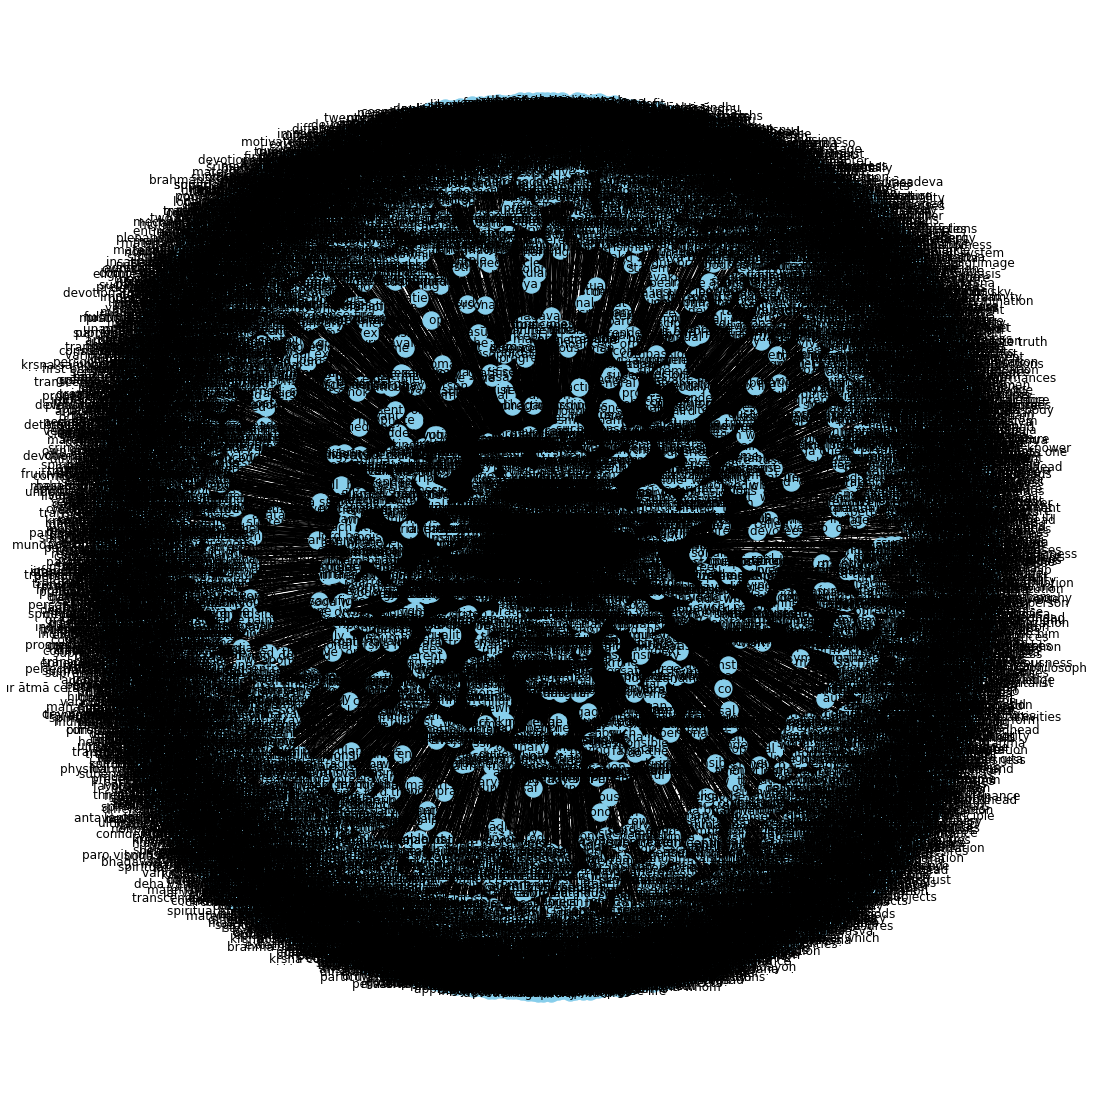

In [22]:
plt.figure(figsize=(15,15))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Knowledge Graph with relation as "was":

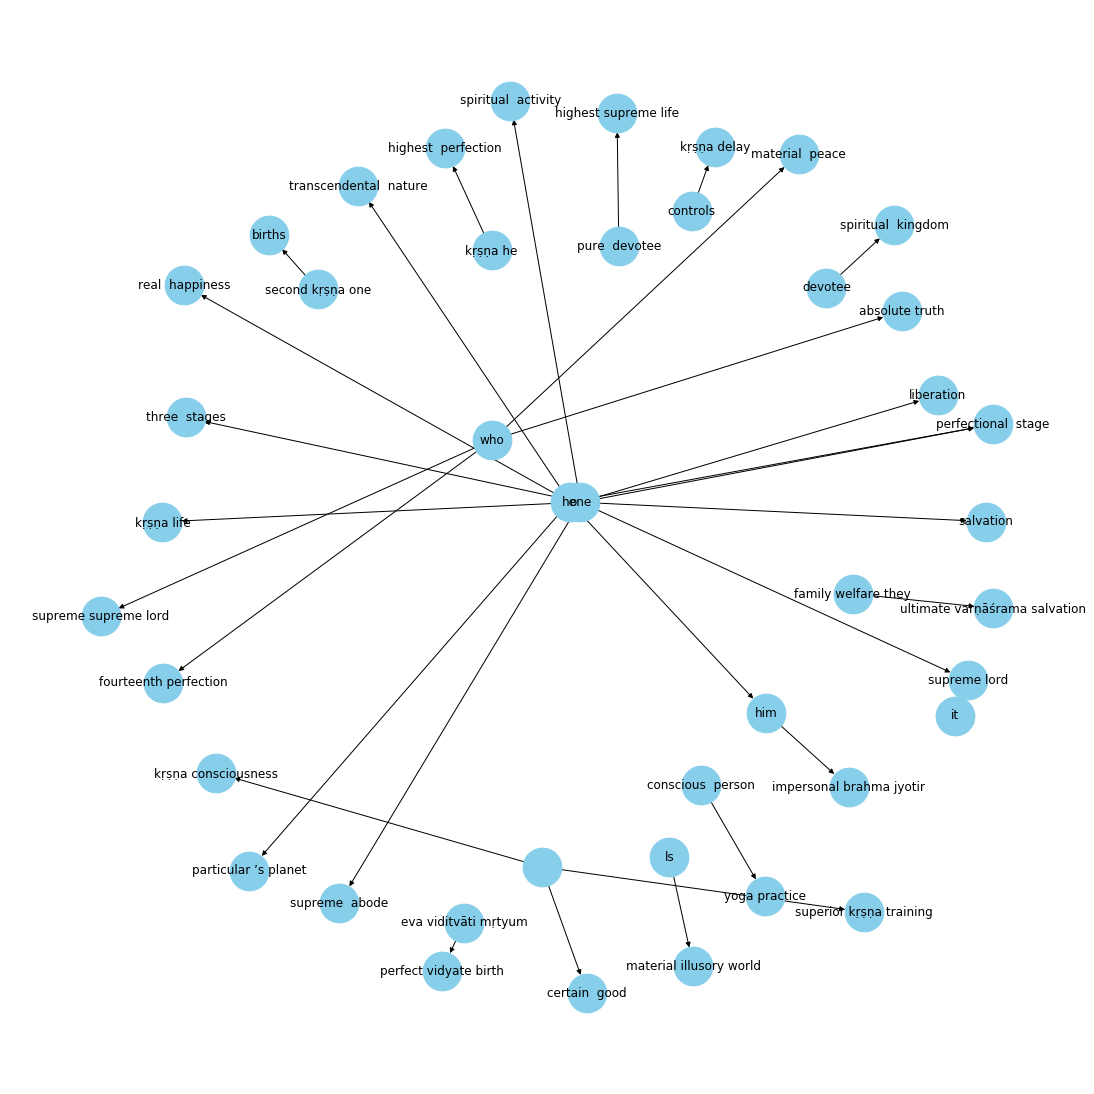

In [23]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="attain"], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k = 0.2) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Knowledge Graph with node as 'Arjuna':

In [24]:
node = 'arjuna'
node = node.lower()
G = nx.from_pandas_edgelist(kg_df[kg_df['source']==node], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

# print(G.edges())

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k = 0.2) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# Search System:

### Word Embedding

In [26]:
import gensim.models.keyedvectors as word2vec

#limit is 50000
model = word2vec.KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin",binary=True, limit = 50000)

In [27]:
model.save('Google_word_embed.model')

In [16]:
# m = word2vec.load('Google_word_embed.model')

In [28]:
model.most_similar(positive=['love', 'attain'], negative=['man'])

[('achieve', 0.5367754101753235),
 ('adore', 0.4579395651817322),
 ('attained', 0.44963306188583374),
 ('aspire', 0.44019997119903564),
 ('enjoy', 0.4400051236152649),
 ('attaining', 0.42535001039505005),
 ('appreciate', 0.41713014245033264),
 ('achieving', 0.4124097526073456),
 ('strive', 0.41170063614845276),
 ('accomplish', 0.40640634298324585)]

In [29]:
model.most_similar(positive=['eat'])

[('eating', 0.7529404163360596),
 ('ate', 0.7013994455337524),
 ('eaten', 0.6724975109100342),
 ('eats', 0.6589087247848511),
 ('consume', 0.6184970736503601),
 ('Eat', 0.5889648199081421),
 ('Eating', 0.5729314088821411),
 ('dine', 0.566680908203125),
 ('meal', 0.558600127696991),
 ('cook', 0.5514435768127441)]

## Working with Query

In [30]:
query = 'who eats a burger'

query1 = nlp(query)

for token in query1:
    print(token.text, token.pos_, token.tag_,token.dep_)

who PRON WP nsubj
eats VERB VBZ ROOT
a DET DT det
burger NOUN NN dobj


In [31]:
def relation(query):
    result = []
    d = nlp(query)
    
    for t in d:
        if(t.pos_ =='VERB'):
            temp = t.lemma_
            return temp

In [32]:
relation(query)

'eat'

In [33]:
get_entities(query)[1]

'burger'

In [34]:
def search_result(query):
    r = []
    e = []
    
    answer = []
    answer2 = []
    
    relations = relation(query)
    relations = relations.lower()
    entity = get_entities(query)[1]
    entity = entity.lower()
    
    
    r = model.most_similar(positive=[relations],topn=20)
    r.append([relations,1])
    e = model.most_similar(positive=[entity],topn=20)
    e.append([entity,1])
    
    temp = len(r)
    for j in range(temp):
        t = r[j][0]
        if kg_df['edge'].str.contains(t).any():
            G = nx.from_pandas_edgelist(kg_df[kg_df['edge']==t], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
            for i in G.edges():
                gemp = len(e)
                for p in range(gemp):
                    s = e[p][0]
                    if(i[0]==s):
                        answer.append(i[1])
                    elif(i[1]==s):
                        answer2.append(i[0])
        print(t)
        print(answer,answer2)
        

# Search Here::

In [42]:
query = input()
search_result(query)

who attains liberation
achieve
[] []
attaining
[] []
attained
[] []
achieving
[] []
achieved
[] []
Achieving
[] []
accomplish
[] []
attainable
[] []
reach
[] []
achieves
[] []
earn
[] []
attainment
[] []
maintain
[] []
obtain
[] []
sustain
[] []
elevate
[] []
aspire
[] []
achievable
[] []
fulfill
[] []
ascend
[] []
attain
[] ['one']


Things to be done:
    1. Irrespective of sapce
    2. Irrespective of complete words
    3. similar verbs or relations

# Rough

In [154]:
matcher = Matcher(nlp.vocab)
pattern = [{"LOWER": "hello"},
           {"LOWER": "world"}]

matcher.add("HelloWorld", None, pattern)
matcher.add("GoogleMaps", None, [{"ORTH": "Google"}, {"ORTH": "Maps"}])
doc = nlp("HEllo and world. Google and Maps")
matches = matcher(doc)

k = len(matches) - 1

if(k>0):
    span = doc[matches[k][1]:matches[k][2]] 

    print(span.text)